In [ ]:
#@title import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('dark_background' )
from cycler import cycler       # cycler(linestyle=['-','--',':','-.') * cycler(color=colors) cycler(lw=[1,5])
plt.rc('axes', prop_cycle=cycler(color=list('rbygmcw')+['orangered', 'gray', 'gold','coral']))

import os
import sys

from scipy import stats
from scipy.signal import savgol_filter
from scipy.ndimage import generic_filter
from scipy.signal import freqz
from scipy.signal import butter, lfilter

from google.colab import drive
drive.mount('/gdrive')

import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

Mounted at /gdrive


In [ ]:
# #@title import

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# plt.style.use('dark_background' )
# from cycler import cycler       # cycler(linestyle=['-','--',':','-.') * cycler(color=colors) cycler(lw=[1,5])
# plt.rc('axes', prop_cycle=cycler(color=list('rbygmcw')+['orangered', 'gray', 'gold','coral']))
# plt.rc('font', size=8) 

# import os
# import sys

# from scipy import stats
# from scipy.signal import savgol_filter
# from scipy.ndimage import generic_filter
# from scipy.signal import freqz
# from scipy.signal import butter, lfilter

# import tensorflow as tf
# from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, Concatenate, Lambda, Dropout, LayerNormalization
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.regularizers import l2
# from sklearn.model_selection import train_test_split

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense, Dropout
# from keras import optimizers
# from tensorflow import keras
# import tensorflow as tf 

# from keras.models import load_model

# from google.colab import drive
# drive.mount('/gdrive')

# import json
# # keys = '/gdrive/MyDrive/korobool/keys.json'
# keys = '/gdrive/MyDrive/ai-labs-2022/caretech/aws/keys.json'

# with open(keys) as f:
#     keys = json.loads(f.read())

# !pip install boto3 -q
# import boto3
# import botocore.config

In [ ]:
# #@title function
# def file_names_bins_csvs(files):
#     file_1 = [i for i in  files.split('\n') if len(i)>4]
#     f1, f2= [i.split()[0] for i in file_1], []
#     if len(file_1[0].split())>1:    f2 = [i.split()[1] for i in file_1]
#     if '.bin' in f1[0]:
#         bins, csvs = f1, f2
#     else:
#         bins, csvs = f2, f1
#     return bins, csvs

# def load_files(files, bucket="urowell2.0-devv", prefix='uploads/', keys=keys,  verbose=False):
#     '''загрузка файлов bin+csv'''
#     session = boto3.Session(aws_access_key_id=keys['aws_access_key_id'], 
#                             aws_secret_access_key=keys['aws_secret_access_key'])
#     client = session.client(
#         "s3",
#         config=botocore.config.Config(region_name="eu-north-1", signature_version="s3v4"),
#         )
#     aws_objects_keys = [prefix + f for f in files]
#     for key in aws_objects_keys:
#         client.download_file(bucket,  key, key.split("/")[-1])
#         if verbose: print(key)

# def butter_bandpass(lowcut, highcut, fs, order=6):
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='band')
#     return b, a

# def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
#     '''Филтр средних частот - возвращает отфильтр data'''
#     b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#     y = lfilter(b, a, data)
#     return y

# def butter_lowpass(cutoff, fs, order=5):
#     return butter(order, cutoff, fs=fs, btype='low', analog=False)

# def butter_lowpass_filter(data, cutoff, fs, order=5):
#     '''Филтр нижних частот - возвращает отфильтр data'''
#     b, a = butter_lowpass(cutoff, fs, order=order)
#     y = lfilter(b, a, data)
#     return y

# def cut(x, start, size=1):     
#     '''Возвращает np.array '''
#     t = list(x[start:])          
#     t1 = np.mean(t[:size])
#     res = [t1]*(start) + t  
#     return np.array(res)

# def add_N(x, N, size=1):     
#     '''Возвращает np.array '''
#     t1 = np.mean(x[-size:])
#     t = list(x) + [t1]*(N-len(x))     
#     return np.array(t)


# def cut_peak(x):
#     L = len(x)
#     m1 = max(x)
#     x[0] = x[1]
#     if L>2:
#         if x[L-1]>0.9*m1 or x[L-1]==0: x[L-1] = x[L-2]
#         x = [x[0]] + [(x[i-1]+x[i+1]/2) if x[i]>0.9*m1 or x[i]==0 else x[i] for i in range(1,L-1) ] + [x[L-1]] 
#     return np.array(x)

# def read_file_to_df(filename):
#     with open(filename) as f:
#         data = np.fromfile(f, dtype='<u2')
#     df = pd.DataFrame(cut_peak(data), columns=['x'])   # df['measure time(ms)'] = df.index * 18 #np.arange(start=0, stop=10, step=3)
#     df['x_lg'] = np.log10(df.x)
#     return df

# def interpolate_x_to_N(y1, N2, shift=0):
#     '''Расчет '''
#     fx = lambda x, x1, x2, y1, y2: y1 + (y2-y1)/(x2-x1)*(x-x1)
#     y2 = []
#     N1 = len(y1)
#     x1 = np.append(np.arange(N1) * N2/N1, N2)
#     k = 0
#     for i in range(N2):
#         if i == 0 :      y2.append(y1[0])            
#         elif k >= N1-1:  y2.append(y1[N1-1])     
#         elif i < x1[k+1]:            
#             y2.append(fx(i, x1[k], x1[k+1], y1[k], y1[k+1]))            
#         else:    
#             k += 1
#             if k >= N1-1: 
#                 y2.append(y1[N1-1] )
#             else:
#                 y2.append(fx(i, x1[k], x1[k+1], y1[k], y1[k+1]))
#     y2 = y2[shift:] + [y2[-1]]*shift
#     return y2

# def add_diff(x):
#     x['fl_f'] = np.insert(np.diff(x['flow_meter']), 0, 0)

# def add_interpolate(x1,x2,shift=0):
#     x1['fl_f'] = interpolate_x_to_N(x2['fl_f'], len(x1), shift)

# def len_to_max(t, N, size=30):
#     k = list(t.columns)      
#     d = {k[i]: [np.mean(t[k[i]][-size:])]*(N-len(t)) for i in range(len(k))}
#     return pd.concat([t, pd.DataFrame(d)], ignore_index=True)

# def add_x(x, name, data):
#     x[name] = data
    
# def freq_filter(x,frequencies, fs=58, order=6, size=166, start_cut=250, dx=0):
#     d1, d2={}, {}
#     f = [0] + frequencies
#     d1['f_0_'+str(f[1])] = cut(butter_lowpass_filter(x, f[1], fs, order), start_cut)
#     d2['d_0_'+str(f[1])] = generic_filter(d1['f_0_'+str(f[1])], np.std, size)

#     for i in range(2, len(f)):    
#         txt = str(f[i-1])+'_'+str(f[i])
#         if i==2:  
#             d1['f_'+txt] = cut(butter_bandpass_filter(x, f[i-1], f[i]+dx, fs, order), start_cut)
#         else:
#             d1['f_'+txt] = cut(butter_bandpass_filter(x, f[i-1]-dx, f[i]+dx, fs, order), start_cut)
#         d2['d_'+txt] = generic_filter(d1['f_'+txt], np.std, size)
#     df_f = pd.DataFrame(d1 | d2)
#     return df_f

# def freq_filter_df(x,frequencies, fs=58, order=5, size=166, start_cut=250, dx=0):
#     X = x['x_lg']
#     d1, d2={}, {}
#     f = [0] + frequencies
#     d1['f_0_'+str(f[1])] = cut(butter_lowpass_filter(X, f[1], fs, order), start_cut*2)
#     d2['d_0_'+str(f[1])] = generic_filter(d1['f_0_'+str(f[1])], np.std, size)
    
#     x['std'] = generic_filter(X, np.std, size=size)
#     x['f_no_low'] = X - d1['f_0_'+str(f[1])]                    # no_low_freq
#     x['d'] = generic_filter(x['f_no_low'], np.std, size=size)     #  dispersion
#     x['ds'] = savgol_filter(x['d'], 151, 3)                     # disp_savgol

#     for i in range(2, len(f)):    
#         txt = str(f[i-1])+'_'+str(f[i])
#         if i==2:  
#             d1['f_'+txt] = cut(butter_bandpass_filter(X, f[i-1], f[i]+dx, fs, order), start_cut)
#         else:
#             d1['f_'+txt] = cut(butter_bandpass_filter(X, f[i-1]-dx, f[i]+dx, fs, order), start_cut)
#         d2['d_'+txt] = generic_filter(d1['f_'+txt], np.std, size)
#     df_f = pd.DataFrame(d1 | d2)
#     return pd.concat([x, df_f], axis=1)


# def get_start_x(x, N=50, kR=2, N_del=50, dt = 0):
#     '''Возвращает индекс СТАРТА, FINISH по sharp['x']'''        
#     x1 = x[::-1]; L = len(x); dt1=0
#     R0 = max(x[N_del:N_del+N]) - min(x[N_del:N_del+N])
#     R1 = max(x1[N_del:N_del+N]) - min(x1[N_del:N_del+N])
#     R0 = max(R0,R1)

#     x0 = min(x[N_del:N_del+N]) + R0/2
#     for i,xi in enumerate(x[N_del:]):
#         dx = abs(xi - x0)
#         if dx > R0 * kR:          
#             break
#     if i>dt: dt1 = dt
#     start = i+N_del - dt1      
    
#     x0 = min(x1[N_del:N_del+N]) + R0/2
#     for i,xi in enumerate(x1[N_del:]):
#         dx = abs(xi - x0)
#         if dx > R0 * kR:          
#             break
#     if i>dt: dt1 = dt
#     finish = L - i + dt1
#     return start, finish



# def d_max_calc(x, list_k): 
#     '''Возврвщает d_max = dict(k:v) k-параметр v-max
#     list_k=['xx','ev','ef','fil','fl','fh','fnl','d','ds']
#     x=df.n2'''
#     list_v = [0]*len(list_k)
#     d = dict(zip(list_k, list_v))
#     d2 = {k: [max(i[k]) for i in x] for k in d}
#     d_max = {k:max(v) for k,v in d2.items()}
#     return d_max

# def add_df_segment(x,  Nsegm, segment, dl_segm, d_max):  
#     '''Сегментация+norm df['segm'] <= (df.bin[d_max])  len(df['segm'])=2*Nsegm
#     segment=дл.сегм, Nsegm=кол.сегм, dl_segm=шаг, d_max{k:v}=словарь из норм.
#     '''    
#     d={}
#     for k in d_max:     
#         xk = list(x[k])
#         xk = [xk[0]]*segment + xk
#         s = [np.mean(xk[(i*dl_segm):i*dl_segm+segment]) for i in range(Nsegm)]
#         d[k] = np.array( [s[0]]*Nsegm + s) / d_max[k]
        
#     no_mean = ['std', 'd', 'ds'] 
#     for k in no_mean:
#         s = [x[k][i*dl_segm] for i in range(Nsegm)]
#         d[k] = np.array( [s[0]]*Nsegm + s) / d_max[k]

#     df_segm = pd.DataFrame(d)
#     return df_segm

# def split_step(x, step=120):  # step = Nsegm 
#     '''Формирует Х - для LSTM model
#     x[0..N] ==> x_step[ [0..st] .. [N-st..N] ] '''
#     n_x = len(x)  
#     x_step = ([x[i-step:i] for i in range(step, n_x)])     
#     return (x_step)

# def st_fn_div_d(Ne, d, L1):  
#     '''Разбивает х(Ne=len(x) на d частей(длина одного графка=L1)
#     возвращает индексы Старт, Финиш - каждой части'''  
#     nn = (Ne-1)//(d*L1)
#     st = [i*L1*d for i in range(nn+1)]
#     fn = [st[i+1] for i in range(nn)] + [Ne]
#     return st, fn

# def analiz_predict(x1, t1):
#     L = len(x1); 
#     i1, i2 = get_start_x(x1, dt = 0, N_del=5, N=5)           # get_start_x(x['fl_f'], N=10,N_del=10, dt=0)
#     # i2 = get_sharp_finish(x1, dt = 0, N=5, kR=5)   
#     v = sum(x1[i1:i2])*t1
#     m = max(x1) #     
#     im = np.array(x1).argmax()  
#     tm = (im) * t1    # f = 58 dl_segm=33pts
#     T = (i2-i1) * t1      
#     TQmax = (im-i1)*t1
#     return i1, i2, im, m, v, T, TQmax

# def MXE(x1, x2):
#     L = len(x1)   
#     MAE = sum([abs(x1[i]-x2[i]) for i in range(L)])/L
#     MSE = sum([(x1[i]-x2[i])**2 for i in range(L)])/L
#     MSE_1 = MSE**0.5    
#     return MAE, MSE, MSE_1    

# def mask_to_data(x, x_0=0, x_x=1, x_max=2, n_max=10):
    
#     def mask_do(x, x_0=0, x_x=1, x_max=2, n_max=10):
#         i_start, i_finish = get_start_x(x, N=3, kR=0.8, N_del=0, dt = 0)
#         i_max = x.argmax()
#         if i_max-i_start < n_max: n1 = i_start 
#         else: n1 = i_max - n_max
#         if i_finish - i_max < n_max: n2 = i_finish 
#         else: n2 = i_max + n_max
#         res = np.array([x_0]*i_start  + [x_x]*(i_finish-i_start) + [x_0]*(len(x)-i_finish))
#         res[n1:n2] = x_max
#         return res

#     r1=len(x); r2=(x.shape[1])
#     mask = np.array([mask_do(x1, x_0=0, x_x=1, x_max=2, n_max=10) for x1 in x])

#     y_mask = np.concatenate([x.reshape((r1, r2, 1)), mask.reshape((r1, r2, 1))], axis=2)
#     return  y_mask

# def vectorize(x, N, start, param_names): 
#     '''Формирует Х(Nфайлов, 2хNsegm, N_param) - list[]
#     param_names = ['xx', 'fl', 'fnl', 'fh', 'ds', 'd'] '''  
#     # return [[(x[k][i]) for k in param_names] for i in range(start, start+N)]
#     # return [(x[k][start:start+N]) for k in param_names] 
#     return [[x[p][i] for p in param_names] for i in range(start,start+N)] 

# def df_to_xy(df, Nsegm, param_names):
#     y_n = len(df) 
#     y0, x0 = [], []
#     y = np.hstack(df.apply(lambda x: list(x.segm.fl_f)[Nsegm:], axis=1).to_numpy())
#     y0 = y.reshape((y_n,  -1))   
#     y0 = np.array(y0)
#     y_mask = mask_to_data(y0)
        
#     XX = df.apply(lambda x: vectorize(x.segm, Nsegm, Nsegm, param_names), axis=1)
#     x0 = np.array([np.array(i) for i in XX])

#     return x0, y_mask

# def df_to_data(df):
#     '''Формирует st_fn=(N_file,2=st+fn) и max_data=(N_file,2=ind+max)'''  
#     df_to_st_fn = lambda x: np.array([x.start, x.finish]).transpose()
#     st_fn = df_to_st_fn(df)
#     max_value = df.bin.apply(lambda x: max(x.x_lg))
#     max_index = df.bin.apply(lambda x: np.argmax(x.x_lg))
#     max_data = np.array([max_index, max_value]).transpose()
#     return st_fn, max_data

# # Transformer layers
# def transformer_encoder(inputs, num_heads=8, dff=2048, rate=0.01):
#     x = inputs
#     for _ in range(2):  # Increase the number of layers for a deeper model
#         attn_output = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=x.shape[-1])(x, x)
#         attn_output = Dropout(rate)(attn_output)
#         out1 = LayerNormalization(epsilon=1e-6)(x + attn_output)

#         ffn_output = Dense(dff, activation='relu', kernel_regularizer=l2(1e-4))(out1)  # Apply L2 regularization
#         ffn_output = Dense(x.shape[-1], kernel_regularizer=l2(1e-4))(ffn_output)  # Apply L2 regularization
#         ffn_output = Dropout(rate)(ffn_output)

#         x = LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

#     return x

# def tf_moving_average(data, window_size):
#     kernel = tf.ones(window_size) / tf.cast(window_size, data.dtype)
#     kernel = tf.reshape(kernel, [window_size, 1, 1])
#     return tf.nn.conv1d(tf.expand_dims(data, axis=-1), kernel, stride=1, padding='VALID')

# # combined_loss function to incorporate the signal monotonicity intervals time error. 
# def combined_loss(y_true, y_pred, alpha=0.1, window_size=19):
#     y_pred_smoothed = tf_moving_average(y_pred, window_size)
#     y_pred_smoothed = tf.squeeze(y_pred_smoothed, axis=-1)  # Squeeze the extra dimension
#     y_true_cropped = y_true[:, window_size // 2:-(window_size // 2)]

#     mse = tf.keras.losses.MeanSquaredError()(y_true_cropped, y_pred_smoothed)

#     # Find the monotonicity intervals
#     true_max_diff = y_true_cropped[:, 1:] - y_true_cropped[:, :-1]
#     pred_max_diff = y_pred_smoothed[:, 1:] - y_pred_smoothed[:, :-1]

#     true_min_diff = -true_max_diff
#     pred_min_diff = -pred_max_diff

#     # Calculate the time error
#     max_time_error = tf.reduce_mean(tf.maximum(0., true_max_diff - pred_max_diff), axis=-1)
#     min_time_error = tf.reduce_mean(tf.maximum(0., true_min_diff - pred_min_diff), axis=-1)

#     time_error = max_time_error + min_time_error
#     time_error = tf.cast(time_error, dtype=mse.dtype)
#     alpha = tf.cast(alpha, dtype=mse.dtype)

#     return mse + alpha * time_error

# #  
# def moving_average(data, WS):
#     data_sgl = np.convolve(data, np.ones(WS), 'valid') / WS
#     return np.hstack([data_sgl, [data_sgl[-1]]*(WS-1)])

   

In [ ]:
# #@title download fils - excel
# exsel = '/gdrive/MyDrive/korobool/seq2seq/parametrs/s2s_parametrs.xlsx'
# df_xls = pd.read_excel(exsel, 'files', usecols=['bins', 'csvs', 'comments', 'role']).fillna(0)    # na_filter = False [NaN ==> '']
# df_xls = df_xls[df_xls['role'].isin(['train','foam'])].reset_index(drop=True) 

# index_nofoam = df_xls[(df_xls.role=='train')].index                              # df.iloc[index_train]
# index_foam = df_xls[(df_xls.role=='foam')].index

# df_nofoam = df_xls.iloc[index_nofoam].reset_index(drop=True) 
# df_foam = df_xls.iloc[index_foam].reset_index(drop=True) 

# # bins = list(df_xls.bins);  csvs = list(df_xls.csvs)

# bins = list(df_foam.bins);  csvs = list(df_foam.csvs)


# load_files(bucket="caretech-uploads", keys=keys, files=bins+csvs, prefix='', verbose=0)

# print(f'files={len(df_xls)}   nofoam= {len(index_nofoam)};   foam={len(index_foam)}')

In [ ]:
# #@title download fils
# # new filea fs=200

# files_nofoam = '''
#     1679317050_10521CBCC9F8_flowgen_1.csv	1679317049_10521CBCC9F8_VCNL4200_200.bin
#     1679317218_10521CBCC9F8_flowgen_1.csv	1679317216_10521CBCC9F8_VCNL4200_200.bin
#     1679317298_10521CBCC9F8_flowgen_1.csv	1679317296_10521CBCC9F8_VCNL4200_200.bin
#     1679317350_10521CBCC9F8_flowgen_1.csv	1679317348_10521CBCC9F8_VCNL4200_200.bin
#     1679319408_10521CBCC9F8_flowgen_1.csv	1679319406_10521CBCC9F8_VCNL4200_200.bin
#     1679319459_10521CBCC9F8_flowgen_1.csv	1679319457_10521CBCC9F8_VCNL4200_200.bin
#     1679319515_10521CBCC9F8_flowgen_1.csv	1679319513_10521CBCC9F8_VCNL4200_200.bin
#     1679319606_10521CBCC9F8_flowgen_1.csv	1679319604_10521CBCC9F8_VCNL4200_200.bin
#     1679319656_10521CBCC9F8_flowgen_1.csv	1679319654_10521CBCC9F8_VCNL4200_200.bin
#     1679319701_10521CBCC9F8_flowgen_1.csv	1679319699_10521CBCC9F8_VCNL4200_200.bin
#     1679319802_10521CBCC9F8_flowgen_1.csv	1679319800_10521CBCC9F8_VCNL4200_200.bin
#     1679319852_10521CBCC9F8_flowgen_1.csv	1679319850_10521CBCC9F8_VCNL4200_200.bin
#     1679319898_10521CBCC9F8_flowgen_1.csv	1679319896_10521CBCC9F8_VCNL4200_200.bin
#     1679319954_10521CBCC9F8_flowgen_1.csv	1679319952_10521CBCC9F8_VCNL4200_200.bin
#     1679320003_10521CBCC9F8_flowgen_1.csv	1679320001_10521CBCC9F8_VCNL4200_200.bin
#     1679320055_10521CBCC9F8_flowgen_1.csv	1679320053_10521CBCC9F8_VCNL4200_200.bin
#     1679320111_10521CBCC9F8_flowgen_1.csv	1679320109_10521CBCC9F8_VCNL4200_200.bin
#     1679320185_10521CBCC9F8_flowgen_1.csv	1679320183_10521CBCC9F8_VCNL4200_200.bin
#     1679320234_10521CBCC9F8_flowgen_1.csv	1679320232_10521CBCC9F8_VCNL4200_200.bin
#     1679320286_10521CBCC9F8_flowgen_1.csv	1679320284_10521CBCC9F8_VCNL4200_200.bin
#     1679320339_10521CBCC9F8_flowgen_1.csv	1679320337_10521CBCC9F8_VCNL4200_200.bin
#     1679320449_10521CBCC9F8_flowgen_1.csv	1679320447_10521CBCC9F8_VCNL4200_200.bin
#     1679320449_10521CBCC9F8_flowgen_1.csv	1679320447_10521CBCC9F8_VCNL4200_200.bin
#     1679320505_10521CBCC9F8_flowgen_1.csv	1679320503_10521CBCC9F8_VCNL4200_200.bin
#     1679320598_10521CBCC9F8_flowgen_1.csv	1679320596_10521CBCC9F8_VCNL4200_200.bin
#     1679320656_10521CBCC9F8_flowgen_1.csv	1679320654_10521CBCC9F8_VCNL4200_200.bin
#     1679320706_10521CBCC9F8_flowgen_1.csv	1679320704_10521CBCC9F8_VCNL4200_200.bin
#     1679320756_10521CBCC9F8_flowgen_1.csv	1679320754_10521CBCC9F8_VCNL4200_200.bin
#     1679320876_10521CBCC9F8_flowgen_1.csv	1679320874_10521CBCC9F8_VCNL4200_200.bin
#     1679320928_10521CBCC9F8_flowgen_1.csv	1679320926_10521CBCC9F8_VCNL4200_200.bin
    
#     1679479353_10521CBCC9F8_flowgen_1.csv	1679479351_10521CBCC9F8_VCNL4200_200.bin
#     1679479411_10521CBCC9F8_flowgen_1.csv	1679479409_10521CBCC9F8_VCNL4200_200.bin
#     1679479457_10521CBCC9F8_flowgen_1.csv	1679479455_10521CBCC9F8_VCNL4200_200.bin
#     1679479507_10521CBCC9F8_flowgen_1.csv	1679479505_10521CBCC9F8_VCNL4200_200.bin
#     1679479597_10521CBCC9F8_flowgen_1.csv	1679479595_10521CBCC9F8_VCNL4200_200.bin
#     1679479641_10521CBCC9F8_flowgen_1.csv	1679479640_10521CBCC9F8_VCNL4200_200.bin
#     1679479689_10521CBCC9F8_flowgen_1.csv	1679479687_10521CBCC9F8_VCNL4200_200.bin
#     1679479737_10521CBCC9F8_flowgen_1.csv	1679479735_10521CBCC9F8_VCNL4200_200.bin
#     1679479783_10521CBCC9F8_flowgen_1.csv	1679479781_10521CBCC9F8_VCNL4200_200.bin
#     1679479833_10521CBCC9F8_flowgen_1.csv	1679479832_10521CBCC9F8_VCNL4200_200.bin
#     1679479931_10521CBCC9F8_flowgen_1.csv	1679479929_10521CBCC9F8_VCNL4200_200.bin
#     1679480064_10521CBCC9F8_flowgen_1.csv	1679480063_10521CBCC9F8_VCNL4200_200.bin
    
#     1679480220_10521CBCC9F8_flowgen_1.csv	1679480218_10521CBCC9F8_VCNL4200_200.bin
#     1679480300_10521CBCC9F8_flowgen_1.csv	1679480298_10521CBCC9F8_VCNL4200_200.bin
#     1679480371_10521CBCC9F8_flowgen_1.csv	1679480369_10521CBCC9F8_VCNL4200_200.bin
#     1679480447_10521CBCC9F8_flowgen_1.csv	1679480445_10521CBCC9F8_VCNL4200_200.bin
#     1679480524_10521CBCC9F8_flowgen_1.csv	1679480522_10521CBCC9F8_VCNL4200_200.bin
#     1679480629_10521CBCC9F8_flowgen_1.csv	1679480627_10521CBCC9F8_VCNL4200_200.bin
#     1679480722_10521CBCC9F8_flowgen_1.csv	1679480720_10521CBCC9F8_VCNL4200_200.bin
#     1679480801_10521CBCC9F8_flowgen_1.csv	1679480799_10521CBCC9F8_VCNL4200_200.bin
#     1679480879_10521CBCC9F8_flowgen_1.csv	1679480877_10521CBCC9F8_VCNL4200_200.bin
#     1679480948_10521CBCC9F8_flowgen_1.csv	1679480946_10521CBCC9F8_VCNL4200_200.bin
#     1679484253_10521CBCC9F8_flowgen_1.csv	1679484251_10521CBCC9F8_VCNL4200_200.bin
#     1679484438_10521CBCC9F8_flowgen_1.csv	1679484436_10521CBCC9F8_VCNL4200_200.bin
#     1679484580_10521CBCC9F8_flowgen_1.csv	1679484578_10521CBCC9F8_VCNL4200_200.bin
#     1679484652_10521CBCC9F8_flowgen_1.csv	1679484650_10521CBCC9F8_VCNL4200_200.bin
#     1679484794_10521CBCC9F8_flowgen_1.csv	1679484792_10521CBCC9F8_VCNL4200_200.bin
#     1679484863_10521CBCC9F8_flowgen_1.csv	1679484861_10521CBCC9F8_VCNL4200_200.bin
#     1679484957_10521CBCC9F8_flowgen_1.csv	1679484955_10521CBCC9F8_VCNL4200_200.bin
#     1679485068_10521CBCC9F8_flowgen_1.csv	1679485066_10521CBCC9F8_VCNL4200_200.bin
#     1679485115_10521CBCC9F8_flowgen_1.csv	1679485113_10521CBCC9F8_VCNL4200_200.bin
#     1679485165_10521CBCC9F8_flowgen_1.csv	1679485163_10521CBCC9F8_VCNL4200_200.bin
#     1679485213_10521CBCC9F8_flowgen_1.csv	1679485211_10521CBCC9F8_VCNL4200_200.bin
#     1679485276_10521CBCC9F8_flowgen_1.csv	1679485274_10521CBCC9F8_VCNL4200_200.bin
#     1679997704_10521CBCC9F8_flowgen_1.csv	1679997702_10521CBCC9F8_VCNL4200_200.bin
#     1679997750_10521CBCC9F8_flowgen_1.csv	1679997748_10521CBCC9F8_VCNL4200_200.bin
#     1679997796_10521CBCC9F8_flowgen_1.csv	1679997794_10521CBCC9F8_VCNL4200_200.bin
#     1679997842_10521CBCC9F8_flowgen_1.csv	1679997840_10521CBCC9F8_VCNL4200_200.bin
#     1679997891_10521CBCC9F8_flowgen_1.csv	1679997889_10521CBCC9F8_VCNL4200_200.bin
#     1679997938_10521CBCC9F8_flowgen_1.csv	1679997936_10521CBCC9F8_VCNL4200_200.bin
#     1679997986_10521CBCC9F8_flowgen_1.csv	1679997984_10521CBCC9F8_VCNL4200_200.bin
#     1679998032_10521CBCC9F8_flowgen_1.csv	1679998030_10521CBCC9F8_VCNL4200_200.bin
#     1679998079_10521CBCC9F8_flowgen_1.csv	1679998077_10521CBCC9F8_VCNL4200_200.bin
#     1679998170_10521CBCC9F8_flowgen_1.csv	1679998168_10521CBCC9F8_VCNL4200_200.bin
#     1679998223_10521CBCC9F8_flowgen_1.csv	1679998221_10521CBCC9F8_VCNL4200_200.bin
#     1679998269_10521CBCC9F8_flowgen_1.csv	1679998267_10521CBCC9F8_VCNL4200_200.bin
#     1679998353_10521CBCC9F8_flowgen_1.csv	1679998351_10521CBCC9F8_VCNL4200_200.bin
#     1679998404_10521CBCC9F8_flowgen_1.csv	1679998402_10521CBCC9F8_VCNL4200_200.bin
#     1679998503_10521CBCC9F8_flowgen_1.csv	1679998501_10521CBCC9F8_VCNL4200_200.bin
#     1679998556_10521CBCC9F8_flowgen_1.csv	1679998554_10521CBCC9F8_VCNL4200_200.bin
#     1680000151_10521CBCC9F8_flowgen_1.csv	1680000149_10521CBCC9F8_VCNL4200_200.bin
#     1680000208_10521CBCC9F8_flowgen_1.csv	1680000206_10521CBCC9F8_VCNL4200_200.bin
#     1680000304_10521CBCC9F8_flowgen_1.csv	1680000302_10521CBCC9F8_VCNL4200_200.bin
#     1680000351_10521CBCC9F8_flowgen_1.csv	1680000349_10521CBCC9F8_VCNL4200_200.bin
    
#     1680000470_10521CBCC9F8_flowgen_1.csv	1680000468_10521CBCC9F8_VCNL4200_200.bin
#     1680000518_10521CBCC9F8_flowgen_1.csv	1680000516_10521CBCC9F8_VCNL4200_200.bin
#     1680000564_10521CBCC9F8_flowgen_1.csv	1680000562_10521CBCC9F8_VCNL4200_200.bin
#     1680001132_10521CBCC9F8_flowgen_1.csv	1680001131_10521CBCC9F8_VCNL4200_200.bin
#     1680001226_10521CBCC9F8_flowgen_1.csv	1680001224_10521CBCC9F8_VCNL4200_200.bin
#     1680001270_10521CBCC9F8_flowgen_1.csv	1680001268_10521CBCC9F8_VCNL4200_200.bin
#     1680001320_10521CBCC9F8_flowgen_1.csv	1680001318_10521CBCC9F8_VCNL4200_200.bin
#     1680001412_10521CBCC9F8_flowgen_1.csv	1680001410_10521CBCC9F8_VCNL4200_200.bin
#     1680001479_10521CBCC9F8_flowgen_1.csv	1680001477_10521CBCC9F8_VCNL4200_200.bin
#     1680001528_10521CBCC9F8_flowgen_1.csv	1680001526_10521CBCC9F8_VCNL4200_200.bin
#     1680001576_10521CBCC9F8_flowgen_1.csv	1680001574_10521CBCC9F8_VCNL4200_200.bin
#     1680001621_10521CBCC9F8_flowgen_1.csv	1680001619_10521CBCC9F8_VCNL4200_200.bin
    
#     1680001734_10521CBCC9F8_flowgen_1.csv	1680001732_10521CBCC9F8_VCNL4200_200.bin
#     1680001785_10521CBCC9F8_flowgen_1.csv	1680001783_10521CBCC9F8_VCNL4200_200.bin
#     1680001834_10521CBCC9F8_flowgen_1.csv	1680001832_10521CBCC9F8_VCNL4200_200.bin
#     1680001885_10521CBCC9F8_flowgen_1.csv	1680001883_10521CBCC9F8_VCNL4200_200.bin
#     1680001932_10521CBCC9F8_flowgen_1.csv	1680001930_10521CBCC9F8_VCNL4200_200.bin
#     1680001979_10521CBCC9F8_flowgen_1.csv	1680001977_10521CBCC9F8_VCNL4200_200.bin
#     1680002039_10521CBCC9F8_flowgen_1.csv	1680002037_10521CBCC9F8_VCNL4200_200.bin
#     1680002088_10521CBCC9F8_flowgen_1.csv	1680002086_10521CBCC9F8_VCNL4200_200.bin
#     1680002153_10521CBCC9F8_flowgen_1.csv	1680002151_10521CBCC9F8_VCNL4200_200.bin
#     1680002210_10521CBCC9F8_flowgen_1.csv	1680002208_10521CBCC9F8_VCNL4200_200.bin
#     1680002210_10521CBCC9F8_flowgen_1.csv	1680002208_10521CBCC9F8_VCNL4200_200.bin
#     1680002266_10521CBCC9F8_flowgen_1.csv	1680002264_10521CBCC9F8_VCNL4200_200.bin
#     1680002325_10521CBCC9F8_flowgen_1.csv	1680002323_10521CBCC9F8_VCNL4200_200.bin
#     1680002387_10521CBCC9F8_flowgen_1.csv	1680002385_10521CBCC9F8_VCNL4200_200.bin
#     1680002504_10521CBCC9F8_flowgen_1.csv	1680002502_10521CBCC9F8_VCNL4200_200.bin
#     1680002563_10521CBCC9F8_flowgen_1.csv	1680002561_10521CBCC9F8_VCNL4200_200.bin
#     1680002684_10521CBCC9F8_flowgen_1.csv	1680002682_10521CBCC9F8_VCNL4200_200.bin
#     1680002749_10521CBCC9F8_flowgen_1.csv	1680002748_10521CBCC9F8_VCNL4200_200.bin
#     1680002862_10521CBCC9F8_flowgen_1.csv	1680002860_10521CBCC9F8_VCNL4200_200.bin
#     1680002968_10521CBCC9F8_flowgen_1.csv	1680002966_10521CBCC9F8_VCNL4200_200.bin
#     1680003046_10521CBCC9F8_flowgen_1.csv	1680003044_10521CBCC9F8_VCNL4200_200.bin
#     1680003115_10521CBCC9F8_flowgen_1.csv	1680003113_10521CBCC9F8_VCNL4200_200.bin
#     1680003186_10521CBCC9F8_flowgen_1.csv	1680003184_10521CBCC9F8_VCNL4200_200.bin
#     1680003263_10521CBCC9F8_flowgen_1.csv	1680003261_10521CBCC9F8_VCNL4200_200.bin
#     1680003337_10521CBCC9F8_flowgen_1.csv	1680003335_10521CBCC9F8_VCNL4200_200.bin
#     1680003405_10521CBCC9F8_flowgen_1.csv	1680003403_10521CBCC9F8_VCNL4200_200.bin
#     1680003600_10521CBCC9F8_flowgen_1.csv	1680003598_10521CBCC9F8_VCNL4200_200.bin
#     1680003646_10521CBCC9F8_flowgen_1.csv	1680003644_10521CBCC9F8_VCNL4200_200.bin
#     1680003690_10521CBCC9F8_flowgen_1.csv	1680003688_10521CBCC9F8_VCNL4200_200.bin
#     1680003738_10521CBCC9F8_flowgen_1.csv	1680003736_10521CBCC9F8_VCNL4200_200.bin
#     1680003787_10521CBCC9F8_flowgen_1.csv	1680003785_10521CBCC9F8_VCNL4200_200.bin
#     1680768811_10521CBCC9F8_flowgen_1.csv	1680768809_10521CBCC9F8_VCNL4200_200.bin
#     1680768895_10521CBCC9F8_flowgen_1.csv	1680768893_10521CBCC9F8_VCNL4200_200.bin
#     1680768945_10521CBCC9F8_flowgen_1.csv	1680768943_10521CBCC9F8_VCNL4200_200.bin
#     1680768992_10521CBCC9F8_flowgen_1.csv	1680768990_10521CBCC9F8_VCNL4200_200.bin
#     1680769039_10521CBCC9F8_flowgen_1.csv	1680769037_10521CBCC9F8_VCNL4200_200.bin
#     1680769086_10521CBCC9F8_flowgen_1.csv	1680769084_10521CBCC9F8_VCNL4200_200.bin
#     1680769182_10521CBCC9F8_flowgen_1.csv	1680769180_10521CBCC9F8_VCNL4200_200.bin
#     1680769229_10521CBCC9F8_flowgen_1.csv	1680769227_10521CBCC9F8_VCNL4200_200.bin
#     1680769275_10521CBCC9F8_flowgen_1.csv	1680769273_10521CBCC9F8_VCNL4200_200.bin

#     1680769640_10521CBCC9F8_flowgen_1.csv	1680769638_10521CBCC9F8_VCNL4200_200.bin
#     1680771884_10521CBCC9F8_flowgen_1.csv	1680771882_10521CBCC9F8_VCNL4200_200.bin
#     1680771942_10521CBCC9F8_flowgen_1.csv	1680771940_10521CBCC9F8_VCNL4200_200.bin
#     1680772061_10521CBCC9F8_flowgen_1.csv	1680772059_10521CBCC9F8_VCNL4200_200.bin
#     1680772119_10521CBCC9F8_flowgen_1.csv	1680772117_10521CBCC9F8_VCNL4200_200.bin
#     1680772200_10521CBCC9F8_flowgen_1.csv	1680772198_10521CBCC9F8_VCNL4200_200.bin
#     1680772262_10521CBCC9F8_flowgen_1.csv	1680772260_10521CBCC9F8_VCNL4200_200.bin
#     1680772319_10521CBCC9F8_flowgen_1.csv	1680772317_10521CBCC9F8_VCNL4200_200.bin
#     1680772378_10521CBCC9F8_flowgen_1.csv	1680772376_10521CBCC9F8_VCNL4200_200.bin
#     1680772495_10521CBCC9F8_flowgen_1.csv	1680772493_10521CBCC9F8_VCNL4200_200.bin
#     1680772613_10521CBCC9F8_flowgen_1.csv	1680772611_10521CBCC9F8_VCNL4200_200.bin
#     1680772664_10521CBCC9F8_flowgen_1.csv	1680772662_10521CBCC9F8_VCNL4200_200.bin
#     1680772716_10521CBCC9F8_flowgen_1.csv	1680772714_10521CBCC9F8_VCNL4200_200.bin
#     1679317451_10521CBCC9F8_flowgen_1.csv	1679317449_10521CBCC9F8_VCNL4200_200.bin
#     1679479553_10521CBCC9F8_flowgen_1.csv	1679479551_10521CBCC9F8_VCNL4200_200.bin
#     1679484722_10521CBCC9F8_flowgen_1.csv	1679484720_10521CBCC9F8_VCNL4200_200.bin
#     1679998453_10521CBCC9F8_flowgen_1.csv	1679998451_10521CBCC9F8_VCNL4200_200.bin
#     1680001366_10521CBCC9F8_flowgen_1.csv	1680001364_10521CBCC9F8_VCNL4200_200.bin
#     1680002614_10521CBCC9F8_flowgen_1.csv	1680002612_10521CBCC9F8_VCNL4200_200.bin
#     1680003473_10521CBCC9F8_flowgen_1.csv	1680003471_10521CBCC9F8_VCNL4200_200.bin
#     1680769132_10521CBCC9F8_flowgen_1.csv	1680769130_10521CBCC9F8_VCNL4200_200.bin
#     1680772001_10521CBCC9F8_flowgen_1.csv	1680771999_10521CBCC9F8_VCNL4200_200.bin
#     1680772554_10521CBCC9F8_flowgen_1.csv	1680772552_10521CBCC9F8_VCNL4200_200.bin'''


#     # 1679320975_10521CBCC9F8_flowgen_1.csv	1679320973_10521CBCC9F8_VCNL4200_200.bin - 
#     # 1679480142_10521CBCC9F8_flowgen_1.csv	1679480140_10521CBCC9F8_VCNL4200_200.bin -
#     # 1680000403_10521CBCC9F8_flowgen_1.csv	1680000401_10521CBCC9F8_VCNL4200_200.bin -
#     # 1680001668_10521CBCC9F8_flowgen_1.csv	1680001666_10521CBCC9F8_VCNL4200_200.bin -
#     # 1680769325_10521CBCC9F8_flowgen_1.csv	1680769323_10521CBCC9F8_VCNL4200_200.bin -
#     # 1680769374_10521CBCC9F8_flowgen_1.csv	1680769372_10521CBCC9F8_VCNL4200_200.bin -
#     # 1680769420_10521CBCC9F8_flowgen_1.csv	1680769418_10521CBCC9F8_VCNL4200_200.bin -
#     # 1680769471_10521CBCC9F8_flowgen_1.csv	1680769469_10521CBCC9F8_VCNL4200_200.bin -
#     # 1680769517_10521CBCC9F8_flowgen_1.csv	1680769515_10521CBCC9F8_VCNL4200_200.bin -
#     # 1680769569_10521CBCC9F8_flowgen_1.csv	1680769567_10521CBCC9F8_VCNL4200_200.bin -

# files_foam = '''
#     1679485395_10521CBCC9F8_flowgen_1.csv	1679485393_10521CBCC9F8_VCNL4200_200.bin
#     1679485477_10521CBCC9F8_flowgen_1.csv	1679485475_10521CBCC9F8_VCNL4200_200.bin
#     1679485792_10521CBCC9F8_flowgen_1.csv	1679485790_10521CBCC9F8_VCNL4200_200.bin
#     1679486182_10521CBCC9F8_flowgen_1.csv	1679486180_10521CBCC9F8_VCNL4200_200.bin
#     1679486245_10521CBCC9F8_flowgen_1.csv	1679486243_10521CBCC9F8_VCNL4200_200.bin
#     1679486294_10521CBCC9F8_flowgen_1.csv	1679486292_10521CBCC9F8_VCNL4200_200.bin
#     1679486345_10521CBCC9F8_flowgen_1.csv	1679486343_10521CBCC9F8_VCNL4200_200.bin
#     1679486401_10521CBCC9F8_flowgen_1.csv	1679486399_10521CBCC9F8_VCNL4200_200.bin
#     1679486453_10521CBCC9F8_flowgen_1.csv	1679486451_10521CBCC9F8_VCNL4200_200.bin
#     1679486614_10521CBCC9F8_flowgen_1.csv	1679486612_10521CBCC9F8_VCNL4200_200.bin
#     1679486662_10521CBCC9F8_flowgen_1.csv	1679486660_10521CBCC9F8_VCNL4200_200.bin
#     1679486710_10521CBCC9F8_flowgen_1.csv	1679486708_10521CBCC9F8_VCNL4200_200.bin
#     1679486759_10521CBCC9F8_flowgen_1.csv	1679486757_10521CBCC9F8_VCNL4200_200.bin
#     1679487035_10521CBCC9F8_flowgen_1.csv	1679487033_10521CBCC9F8_VCNL4200_200.bin
#     1679487083_10521CBCC9F8_flowgen_1.csv	1679487081_10521CBCC9F8_VCNL4200_200.bin
#     1679487283_10521CBCC9F8_flowgen_1.csv	1679487281_10521CBCC9F8_VCNL4200_200.bin
#     1679487330_10521CBCC9F8_flowgen_1.csv	1679487328_10521CBCC9F8_VCNL4200_200.bin
#     1679487381_10521CBCC9F8_flowgen_1.csv	1679487379_10521CBCC9F8_VCNL4200_200.bin
#     1679487426_10521CBCC9F8_flowgen_1.csv	1679487424_10521CBCC9F8_VCNL4200_200.bin
#     1679487473_10521CBCC9F8_flowgen_1.csv	1679487471_10521CBCC9F8_VCNL4200_200.bin
#     1679487581_10521CBCC9F8_flowgen_1.csv	1679487580_10521CBCC9F8_VCNL4200_200.bin
#     1679487519_10521CBCC9F8_flowgen_1.csv	1679487517_10521CBCC9F8_VCNL4200_200.bin
#     1679487631_10521CBCC9F8_flowgen_1.csv	1679487629_10521CBCC9F8_VCNL4200_200.bin
#     1679487682_10521CBCC9F8_flowgen_1.csv	1679487680_10521CBCC9F8_VCNL4200_200.bin
#     1679487734_10521CBCC9F8_flowgen_1.csv	1679487732_10521CBCC9F8_VCNL4200_200.bin
#     1679487784_10521CBCC9F8_flowgen_1.csv	1679487782_10521CBCC9F8_VCNL4200_200.bin
#     1679487837_10521CBCC9F8_flowgen_1.csv	1679487836_10521CBCC9F8_VCNL4200_200.bin
#     1679487937_10521CBCC9F8_flowgen_1.csv	1679487935_10521CBCC9F8_VCNL4200_200.bin
#     1679488046_10521CBCC9F8_flowgen_1.csv	1679488044_10521CBCC9F8_VCNL4200_200.bin
#     1679997650_10521CBCC9F8_flowgen_1.csv	1679997648_10521CBCC9F8_VCNL4200_200.bin
#     1680773066_10521CBCC9F8_flowgen_1.csv	1680773064_10521CBCC9F8_VCNL4200_200.bin
#     1680773118_10521CBCC9F8_flowgen_1.csv	1680773116_10521CBCC9F8_VCNL4200_200.bin
#     1680773384_10521CBCC9F8_flowgen_1.csv	1680773382_10521CBCC9F8_VCNL4200_200.bin
#     1680773437_10521CBCC9F8_flowgen_1.csv	1680773435_10521CBCC9F8_VCNL4200_200.bin
#     1680773490_10521CBCC9F8_flowgen_1.csv	1680773488_10521CBCC9F8_VCNL4200_200.bin
#     1680773548_10521CBCC9F8_flowgen_1.csv	1680773546_10521CBCC9F8_VCNL4200_200.bin
#     1680773597_10521CBCC9F8_flowgen_1.csv	1680773595_10521CBCC9F8_VCNL4200_200.bin
#     1680773645_10521CBCC9F8_flowgen_1.csv	1680773643_10521CBCC9F8_VCNL4200_200.bin
#     1680773692_10521CBCC9F8_flowgen_1.csv	1680773690_10521CBCC9F8_VCNL4200_200.bin
#     1680774078_10521CBCC9F8_flowgen_1.csv	1680774076_10521CBCC9F8_VCNL4200_200.bin
#     1680774179_10521CBCC9F8_flowgen_1.csv	1680774177_10521CBCC9F8_VCNL4200_200.bin
#     1680774241_10521CBCC9F8_flowgen_1.csv	1680774239_10521CBCC9F8_VCNL4200_200.bin
#     1680774298_10521CBCC9F8_flowgen_1.csv	1680774296_10521CBCC9F8_VCNL4200_200.bin
#     1680774359_10521CBCC9F8_flowgen_1.csv	1680774357_10521CBCC9F8_VCNL4200_200.bin
#     1680774420_10521CBCC9F8_flowgen_1.csv	1680774418_10521CBCC9F8_VCNL4200_200.bin
#     1680774558_10521CBCC9F8_flowgen_1.csv	1680774556_10521CBCC9F8_VCNL4200_200.bin
#     1680774616_10521CBCC9F8_flowgen_1.csv	1680774614_10521CBCC9F8_VCNL4200_200.bin
#     1680774676_10521CBCC9F8_flowgen_1.csv	1680774674_10521CBCC9F8_VCNL4200_200.bin
#     1680774733_10521CBCC9F8_flowgen_1.csv	1680774731_10521CBCC9F8_VCNL4200_200.bin

#     1680774905_10521CBCC9F8_flowgen_1.csv	1680774903_10521CBCC9F8_VCNL4200_200.bin
#     1680774961_10521CBCC9F8_flowgen_1.csv	1680774959_10521CBCC9F8_VCNL4200_200.bin
#     1680775017_10521CBCC9F8_flowgen_1.csv	1680775015_10521CBCC9F8_VCNL4200_200.bin
#     1680775135_10521CBCC9F8_flowgen_1.csv	1680775133_10521CBCC9F8_VCNL4200_200.bin
#     1680775311_10521CBCC9F8_flowgen_1.csv	1680775309_10521CBCC9F8_VCNL4200_200.bin
#     1680775373_10521CBCC9F8_flowgen_1.csv	1680775371_10521CBCC9F8_VCNL4200_200.bin
#     1680775439_10521CBCC9F8_flowgen_1.csv	1680775437_10521CBCC9F8_VCNL4200_200.bin
#     1680775524_10521CBCC9F8_flowgen_1.csv	1680775522_10521CBCC9F8_VCNL4200_200.bin
#     1680775585_10521CBCC9F8_flowgen_1.csv	1680775583_10521CBCC9F8_VCNL4200_200.bin
#     1680775633_10521CBCC9F8_flowgen_1.csv	1680775631_10521CBCC9F8_VCNL4200_200.bin
#     1680775731_10521CBCC9F8_flowgen_1.csv	1680775729_10521CBCC9F8_VCNL4200_200.bin
#     1680775778_10521CBCC9F8_flowgen_1.csv	1680775776_10521CBCC9F8_VCNL4200_200.bin
#     1680775843_10521CBCC9F8_flowgen_1.csv	1680775841_10521CBCC9F8_VCNL4200_200.bin
#     1680775893_10521CBCC9F8_flowgen_1.csv	1680775891_10521CBCC9F8_VCNL4200_200.bin
#     1680775961_10521CBCC9F8_flowgen_1.csv	1680775959_10521CBCC9F8_VCNL4200_200.bin
#     1680776009_10521CBCC9F8_flowgen_1.csv	1680776007_10521CBCC9F8_VCNL4200_200.bin
#     1680776056_10521CBCC9F8_flowgen_1.csv	1680776054_10521CBCC9F8_VCNL4200_200.bin
#     1680778062_10521CBCC9F8_flowgen_1.csv	1680778060_10521CBCC9F8_VCNL4200_200.bin
#     1680778126_10521CBCC9F8_flowgen_1.csv	1680778124_10521CBCC9F8_VCNL4200_200.bin
#     1680778185_10521CBCC9F8_flowgen_1.csv	1680778183_10521CBCC9F8_VCNL4200_200.bin
#     1680778245_10521CBCC9F8_flowgen_1.csv	1680778243_10521CBCC9F8_VCNL4200_200.bin
#     1680778304_10521CBCC9F8_flowgen_1.csv	1680778302_10521CBCC9F8_VCNL4200_200.bin
#     1680778365_10521CBCC9F8_flowgen_1.csv	1680778363_10521CBCC9F8_VCNL4200_200.bin
#     1680778443_10521CBCC9F8_flowgen_1.csv	1680778441_10521CBCC9F8_VCNL4200_200.bin
#     1680778501_10521CBCC9F8_flowgen_1.csv	1680778499_10521CBCC9F8_VCNL4200_200.bin
#     1680778566_10521CBCC9F8_flowgen_1.csv	1680778564_10521CBCC9F8_VCNL4200_200.bin
#     1680778620_10521CBCC9F8_flowgen_1.csv	1680778618_10521CBCC9F8_VCNL4200_200.bin
#     1680778680_10521CBCC9F8_flowgen_1.csv	1680778678_10521CBCC9F8_VCNL4200_200.bin
#     1680778737_10521CBCC9F8_flowgen_1.csv	1680778736_10521CBCC9F8_VCNL4200_200.bin

#     1680779531_10521CBCC9F8_flowgen_1.csv	1680779529_10521CBCC9F8_VCNL4200_200.bin
#     1680779661_10521CBCC9F8_flowgen_1.csv	1680779659_10521CBCC9F8_VCNL4200_200.bin
#     1680780508_10521CBCC9F8_flowgen_1.csv	1680780506_10521CBCC9F8_VCNL4200_200.bin
#     1680780566_10521CBCC9F8_flowgen_1.csv	1680780564_10521CBCC9F8_VCNL4200_200.bin
#     1680780626_10521CBCC9F8_flowgen_1.csv	1680780624_10521CBCC9F8_VCNL4200_200.bin
#     1680780683_10521CBCC9F8_flowgen_1.csv	1680780681_10521CBCC9F8_VCNL4200_200.bin
#     1680780742_10521CBCC9F8_flowgen_1.csv	1680780740_10521CBCC9F8_VCNL4200_200.bin
#     1680780791_10521CBCC9F8_flowgen_1.csv	1680780789_10521CBCC9F8_VCNL4200_200.bin
#     1680780841_10521CBCC9F8_flowgen_1.csv	1680780839_10521CBCC9F8_VCNL4200_200.bin
#     1680780894_10521CBCC9F8_flowgen_1.csv	1680780892_10521CBCC9F8_VCNL4200_200.bin
#     1680780945_10521CBCC9F8_flowgen_1.csv	1680780943_10521CBCC9F8_VCNL4200_200.bin
#     1680780998_10521CBCC9F8_flowgen_1.csv	1680780996_10521CBCC9F8_VCNL4200_200.bin
#     1680781239_10521CBCC9F8_flowgen_1.csv	1680781237_10521CBCC9F8_VCNL4200_200.bin
#     1680781289_10521CBCC9F8_flowgen_1.csv	1680781287_10521CBCC9F8_VCNL4200_200.bin
#     1680781337_10521CBCC9F8_flowgen_1.csv	1680781335_10521CBCC9F8_VCNL4200_200.bin
#     1680781386_10521CBCC9F8_flowgen_1.csv	1680781384_10521CBCC9F8_VCNL4200_200.bin
#     1680781431_10521CBCC9F8_flowgen_1.csv	1680781429_10521CBCC9F8_VCNL4200_200.bin
#     1680781576_10521CBCC9F8_flowgen_1.csv	1680781574_10521CBCC9F8_VCNL4200_200.bin
#     1680781631_10521CBCC9F8_flowgen_1.csv	1680781629_10521CBCC9F8_VCNL4200_200.bin
#     1680781684_10521CBCC9F8_flowgen_1.csv	1680781682_10521CBCC9F8_VCNL4200_200.bin
#     1680781732_10521CBCC9F8_flowgen_1.csv	1680781730_10521CBCC9F8_VCNL4200_200.bin
#     1680781782_10521CBCC9F8_flowgen_1.csv	1680781780_10521CBCC9F8_VCNL4200_200.bin
#     1680781846_10521CBCC9F8_flowgen_1.csv	1680781844_10521CBCC9F8_VCNL4200_200.bin
#     1680781894_10521CBCC9F8_flowgen_1.csv	1680781892_10521CBCC9F8_VCNL4200_200.bin
#     1680781943_10521CBCC9F8_flowgen_1.csv	1680781941_10521CBCC9F8_VCNL4200_200.bin
#     1680781996_10521CBCC9F8_flowgen_1.csv	1680781994_10521CBCC9F8_VCNL4200_200.bin'''

#     # 1680774793_10521CBCC9F8_flowgen_1.csv	1680774791_10521CBCC9F8_VCNL4200_200.bin-
#     # 1680774793_10521CBCC9F8_flowgen_1.csv	1680774791_10521CBCC9F8_VCNL4200_200.bin-
#     # 1680778815_10521CBCC9F8_flowgen_1.csv	1680778813_10521CBCC9F8_VCNL4200_200.bin-
#     # 1680778876_10521CBCC9F8_flowgen_1.csv	1680778874_10521CBCC9F8_VCNL4200_200.bin-
#     # 1680778934_10521CBCC9F8_flowgen_1.csv	1680778932_10521CBCC9F8_VCNL4200_200.bin-
#     # 1680778994_10521CBCC9F8_flowgen_1.csv	1680778992_10521CBCC9F8_VCNL4200_200.bin-
#     # 1680779116_10521CBCC9F8_flowgen_1.csv	1680779114_10521CBCC9F8_VCNL4200_200.bin-
#     # 1680779199_10521CBCC9F8_flowgen_1.csv	1680779197_10521CBCC9F8_VCNL4200_200.bin-
#     # 1680779266_10521CBCC9F8_flowgen_1.csv	1680779264_10521CBCC9F8_VCNL4200_200.bin-
#     # 1680779335_10521CBCC9F8_flowgen_1.csv	1680779334_10521CBCC9F8_VCNL4200_200.bin-

# bins_nf, csvs_nf = file_names_bins_csvs(files_nofoam)
# bins_f, csvs_f = file_names_bins_csvs(files_foam)
# bins = bins_nf + bins_f
# csvs = csvs_nf + csvs_f

# N_file, N_nf, N_f = len(bins), len(bins_nf), len(bins_f)
# N_test_nf, N_test_f = 15, 10
# print(f'files = nf+f = {N_file}={N_nf}+{N_f};    N_test={N_test_nf}+{N_test_f} ')


# # 1m46s  (263 file = 5m3s)
# load_files(bucket="caretech-uploads", keys=keys, files=bins+csvs, prefix='', verbose=0)


In [ ]:
#@title index + mix
if_print_new_index = False     #@param {type:"boolean"}
if if_print_new_index:
    a0 = np.arange(N_f+N_nf)
    i_nf = a0[0:N_nf];              np.random.shuffle(i_nf)
    i_f = a0[N_nf:];                np.random.shuffle(i_f)
                    
    i_nf_train = i_nf[:-N_test_nf];    i_f_train = i_f[:-N_test_f]
    i_nf_test = i_nf[-N_test_nf:];     i_f_test = i_f[-N_test_f:]
    i_mix_train = np.hstack([i_nf_train, i_f_train])
    np.random.shuffle(i_mix_train)
    print(f' i_nf_test = {list(i_nf_test)}\n i_f_test = {list(i_f_test)}\n i_nf_train = {list(i_nf_train)}\n i_f_train = {list(i_f_train)}\n i_mix_train = {list(i_mix_train)}\n ')

# df_train = df.iloc[i_mix_train]
# df_test = df.iloc[index_test].reset_index(drop=True) 

i_nf_test = [123, 24, 60, 0, 23, 63, 32, 118, 49, 22, 101, 67, 111, 18, 148]
i_f_test = [217, 212, 215, 232, 227, 245, 234, 258, 161, 186]
i_nf_train = [10, 155, 140, 149, 109, 122, 46, 71, 79, 135, 30, 96, 119, 158, 51, 15, 133, 4, 117, 115, 147, 36, 114, 65, 83, 41, 105, 57, 61, 53, 106, 27, 103, 74, 121, 120, 58, 59, 146, 125, 102, 92, 141, 90, 151, 35, 94, 100, 25, 87, 73, 126, 97, 50, 21, 45, 1, 89, 88, 131, 138, 44, 12, 143, 64, 28, 104, 139, 76, 154, 33, 9, 40, 81, 137, 55, 80, 69, 134, 54, 20, 3, 153, 142, 34, 31, 86, 72, 107, 77, 7, 84, 38, 112, 68, 116, 127, 144, 56, 130, 91, 129, 62, 95, 108, 48, 6, 37, 128, 5, 8, 145, 110, 152, 157, 82, 11, 16, 156, 66, 75, 17, 93, 85, 132, 43, 78, 19, 39, 99, 70, 42, 26, 47, 13, 14, 150, 29, 136, 113, 2, 124, 98, 52]
i_f_train = [204, 194, 207, 160, 222, 184, 240, 219, 201, 170, 239, 248, 223, 197, 214, 254, 195, 218, 173, 226, 238, 231, 202, 244, 171, 247, 185, 172, 249, 193, 246, 260, 261, 174, 221, 262, 200, 189, 255, 208, 191, 175, 256, 250, 164, 159, 233, 165, 259, 192, 178, 188, 235, 241, 224, 196, 237, 167, 162, 166, 230, 251, 199, 242, 220, 257, 252, 236, 179, 253, 213, 206, 198, 229, 225, 190, 205, 187, 169, 228, 168, 163, 209, 211, 182, 176, 210, 183, 216, 177, 180, 203, 243, 181]
i_mix_train = [256, 196, 152, 51, 68, 220, 162, 137, 28, 164, 184, 30, 115, 168, 6, 197, 46, 195, 21, 132, 69, 257, 222, 206, 208, 76, 120, 154, 157, 203, 143, 151, 193, 3, 11, 133, 219, 16, 224, 214, 138, 72, 163, 47, 104, 107, 48, 54, 125, 75, 243, 39, 134, 124, 79, 149, 83, 170, 253, 188, 87, 259, 248, 112, 81, 169, 244, 73, 146, 159, 121, 241, 228, 109, 98, 139, 176, 190, 89, 194, 55, 45, 178, 249, 52, 261, 254, 192, 189, 94, 153, 171, 50, 230, 209, 255, 183, 223, 105, 136, 20, 231, 1, 99, 57, 25, 58, 66, 144, 100, 86, 200, 103, 185, 242, 204, 187, 150, 35, 90, 135, 92, 119, 2, 158, 93, 113, 235, 127, 27, 15, 216, 74, 129, 4, 44, 43, 19, 70, 260, 182, 80, 117, 77, 199, 26, 62, 247, 42, 198, 53, 181, 142, 130, 102, 233, 36, 13, 59, 229, 175, 167, 71, 237, 205, 33, 110, 218, 61, 85, 95, 91, 34, 96, 226, 238, 202, 145, 240, 225, 213, 5, 251, 14, 31, 9, 10, 17, 147, 128, 166, 239, 7, 172, 65, 236, 160, 12, 41, 88, 165, 141, 221, 155, 64, 114, 82, 37, 56, 262, 210, 116, 84, 174, 140, 252, 191, 78, 179, 177, 207, 131, 29, 246, 8, 173, 201, 38, 97, 211, 250, 122, 40, 106, 108, 180, 156, 126]
 
print(f'mix_train=nf+f = {len(i_mix_train)}={len(i_nf_train)}+{len(i_f_train)}     nf_test={len(i_nf_test)}    f_test={len(i_f_test)} ')

mix_train=nf+f = 238=144+94     nf_test=15    f_test=10 


In [ ]:
# #@title DF - prepare 

# fs=200
# frequencies = [1,5,15,30,45,60,75,90]

# segment=166; dl_segm=33; size_d=166     # list_k = ['x',...
# shift = 250;    dt=10
# param_names = ['x_lg', 'std', 'f_0_1', 'f_1_5', 'f_5_15', 'f_15_30', 'f_30_45', 'f_45_60', 'f_60_75', 'f_75_90', 'd_0_1', 'd_1_5', 'd_5_15', 'd_15_30', 'd_30_45', 'd_45_60', 'd_60_75', 'd_75_90']

# # ____________ DATAFRAME _____________
# df = pd.DataFrame({'bins_names':bins, 'csvs_names':csvs})                       # названия файлов
# df['csv'] = df.csvs_names.apply(lambda x: pd.read_csv(x)[['flow_meter']])       # df.csv['flow_meter']
# _ = df.apply(lambda x: add_diff(x.csv), axis=1)                                 # df.csv['fl_f'] = diff
# df['bin'] = df.bins_names.apply(lambda x: read_file_to_df(x))                   # df.bin[cut_peak['x'] + ['x_lg'] 
# _ = df.apply(lambda x: add_interpolate(x.bin, x.csv, shift=shift), axis=1)      # df.bins['fl_f'] = interpolate(df.csvs['fl_f'])
# df['len'] = df.bin.apply(lambda x: len(x))                                      # df['len']

# max_L = df.len.max()
# Nelem = int((max_L//dl_segm + 1)*dl_segm)  
# Nsegm = int(Nelem//dl_segm)
# df['bin'] = df.bin.apply(lambda x: len_to_max(x, max_L))                        # len_to_max(df['bin'], max_L)
# df['bin'] = df.bin.apply(lambda x: freq_filter_df(x, frequencies, fs))          # df.bin['frequencies'] + std, d, ds, f_no_low

# st_fn = df['bin'].apply(lambda x: get_start_x(x['fl_f'], N=10,N_del=10, dt=dt)) # def get_start(['fl_f'], dt):
# df['start'], df['finish'] = [x[0] for x in st_fn], [x[1] for x in st_fn]
# df['time_len'] = df['finish'] - df['start'] - dt - dt                           # dt_st dt_fn

# df['L1'] = df.apply(lambda x: sum(x['bin']['x_lg'][x['start']:x['start']+100]) /100, axis=1)
# df['L2'] = df.apply(lambda x: sum(x['bin']['x_lg'][x['finish']-100:x['finish']])/100, axis=1)

# list_k_norm = list(df.bin[0].columns);  
# # list_k = ['x','x_lg', 'fl_f', 'std', 'f_no_low', 'd', 'ds','f_0_1', 'f_1_5', 'f_5_15', 'f_15_30', 'f_30_45', 'f_45_60', 'f_60_75', 'f_75_90', 'd_0_1', 'd_1_5', 'd_5_15', 'd_15_30', 'd_30_45', 'd_45_60', 'd_60_75', 'd_75_90']
# d_max =  d_max_calc(df.bin, list_k_norm)

# df['segm'] = df.bin.apply(lambda x: add_df_segment(x,  Nsegm, segment, dl_segm, d_max)) 
# _ = df.apply(lambda x: add_x(x.segm, 'L1', x.L1/d_max['x_lg']), axis=1)         # add L1, L2
# _ = df.apply(lambda x: add_x(x.segm, 'L2', x.L2/d_max['x_lg']), axis=1)  

# print(f'N_file={N_file};     N_param = {len(param_names)};    Nsegm={Nsegm}')

# d_param = {'d_max':d_max, 'list_k':list_k_norm,
#             'param_names':param_names,  'n_parametr':len(param_names),
#             'Nelem':int(Nelem),  'Nsegm':int(Nsegm), 'dl_segm':dl_segm, 'segment':segment,                
#             'fs':fs, 'shift':shift , 'dt_start':dt, 'dt_finish':dt}


# Prepare additional dataset for full signal task

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# def pad_dataframe_12000(df):
#     # Determine the number of rows to pad
#     rows_to_pad = 12000 - len(df)

#     # If the DataFrame already has 12000 or more rows, return it unchanged
#     if rows_to_pad <= 0:
#         return df

#     # Create a dictionary with the same columns as the DataFrame
#     # filled with zeros for numeric columns and NaN for object columns
#     padding_data = {}
#     for column, dtype in df.dtypes.items():
#         if np.issubdtype(dtype, np.number):
#             padding_data[column] = [0] * rows_to_pad
#         else:
#             padding_data[column] = [np.nan] * rows_to_pad

#     # Create a new DataFrame with the padding data
#     padding_df = pd.DataFrame(padding_data)

#     # Concatenate the original DataFrame and the padding DataFrame
#     padded_df = pd.concat([df, padding_df], ignore_index=True)

#     return padded_df

# def mask_function(value, threshold):
#     if value == 0:
#         return 0
#     elif value >= threshold:
#         return 2
#     else:
#         return 1

# padded_df_list = []
# bins_df_list = list(df['bin'])
# for i, bin_df in enumerate(bins_df_list):

#     padded_df = pad_dataframe_12000(bin_df)
#     padded_df_list.append(padded_df)
#     # print(padded_df.shape)

#     top_3_percent_threshold = padded_df['fl_f'].quantile(0.97)
#     padded_df['mask'] = padded_df['fl_f'].apply(lambda x: mask_function(x, top_3_percent_threshold))
    
#     x_lg_array = padded_df['x_lg'].to_numpy()
#     np.save('/gdrive/MyDrive/ai-labs-2022/caretech/data/signals_for_transformer/{}_X.npy'.format(i), x_lg_array)

#     fl_f_mask_array = padded_df[['fl_f', 'mask']].to_numpy()
#     np.save('/gdrive/MyDrive/ai-labs-2022/caretech/data/signals_for_transformer/{}_Y.npy'.format(i), fl_f_mask_array)



In [ ]:
# plt.plot(np.array(padded_df_list[3]['fl_f']))
# plt.plot(np.array(padded_df_list[3]['mask']))
# plt.show()

In [ ]:
import numpy as np
import os
import glob

# Replace this with the directory containing your training files
data_directory = "/gdrive/MyDrive/ai-labs-2022/caretech/data/signals_for_transformer"

# Get a list of all the files ending with '_X.npy'
x_files = glob.glob(os.path.join(data_directory, "*_X.npy"))

X_train = []
y_train = []

for x_file in x_files:
    # Load the X data
    X = np.load(x_file)
    X = np.reshape(X, (12000, 1))  # Reshape if necessary
    X_train.append(X)

    # Load the corresponding Y data
    y_file = x_file[:-6] + "_Y.npy"
    Y = np.load(y_file)
    Y = np.reshape(Y, (12000, 2))  # Reshape if necessary
    y_train.append(Y)

# Convert the lists to numpy arrays
X_data = np.array(X_train)
y_data = np.array(y_train)

print("X_data shape:", X_data.shape)
print("y_data shape:", y_data.shape)


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_data shape: (263, 12000, 1)
y_data shape: (263, 12000, 2)
X_train shape: (210, 12000, 1)
X_test shape: (53, 12000, 1)
y_train shape: (210, 12000, 2)
y_test shape: (53, 12000, 2)


In [ ]:
# # Convert the lists to numpy arrays
# X_data = np.array(X_train)[:, :9500, :]
# y_data = np.array(y_train)[:, :9500, :]

# print("X_data shape:", X_data.shape)
# print("y_data shape:", y_data.shape)

# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Convert the lists to numpy arrays
X_data = np.array(X_train)[:, :9500, :]
y_data = np.array(y_train)[:, :9500, :]

# Create a scaler object
scaler = MinMaxScaler()

# Reshape the signal part of the data to 2D, apply the scaler, and then reshape it back to 3D
X_data[:, :, 0] = scaler.fit_transform(X_data[:, :, 0].reshape(-1, 1)).reshape(X_data.shape[0], X_data.shape[1])
y_data[:, :, 0] = scaler.fit_transform(y_data[:, :, 0].reshape(-1, 1)).reshape(y_data.shape[0], y_data.shape[1])

print("X_data shape:", X_data.shape)
print("y_data shape:", y_data.shape)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_data shape: (210, 9500, 1)
y_data shape: (210, 9500, 2)
X_train shape: (168, 9500, 1)
X_test shape: (42, 9500, 1)
y_train shape: (168, 9500, 2)
y_test shape: (42, 9500, 2)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Convert the lists to numpy arrays
X_data = np.array(X_train)[:, :9500, :]
y_data = np.array(y_train)[:, :9500, :]

# Create a scaler object
scaler = MinMaxScaler()

# Reshape the signal part of the data to 2D, apply the scaler, and then reshape it back to 3D
X_data[:, :, 0] = scaler.fit_transform(X_data[:, :, 0].reshape(-1, 1)).reshape(X_data.shape[0], X_data.shape[1])
y_data[:, :, 0] = scaler.fit_transform(y_data[:, :, 0].reshape(-1, 1)).reshape(y_data.shape[0], y_data.shape[1])

print("X_data shape:", X_data.shape)
print("y_data shape:", y_data.shape)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_data shape: (168, 9500, 1)
y_data shape: (168, 9500, 2)
X_train shape: (134, 9500, 1)
X_test shape: (34, 9500, 1)
y_train shape: (134, 9500, 2)
y_test shape: (34, 9500, 2)


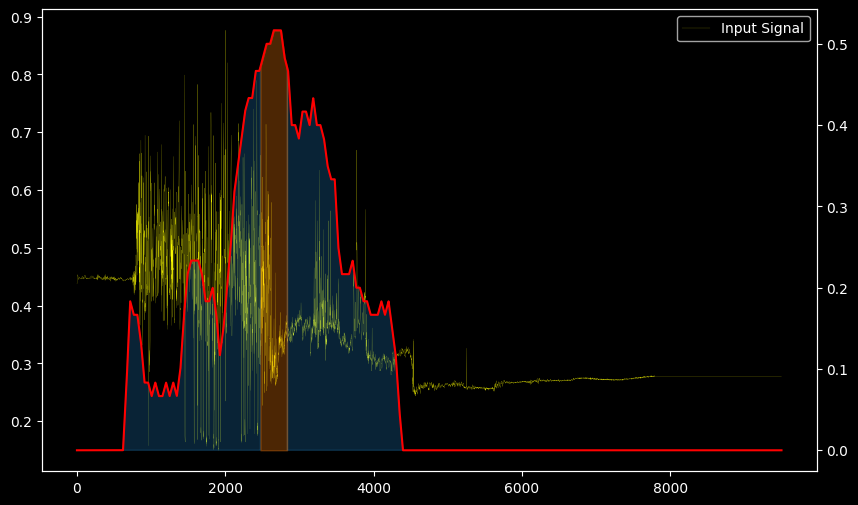

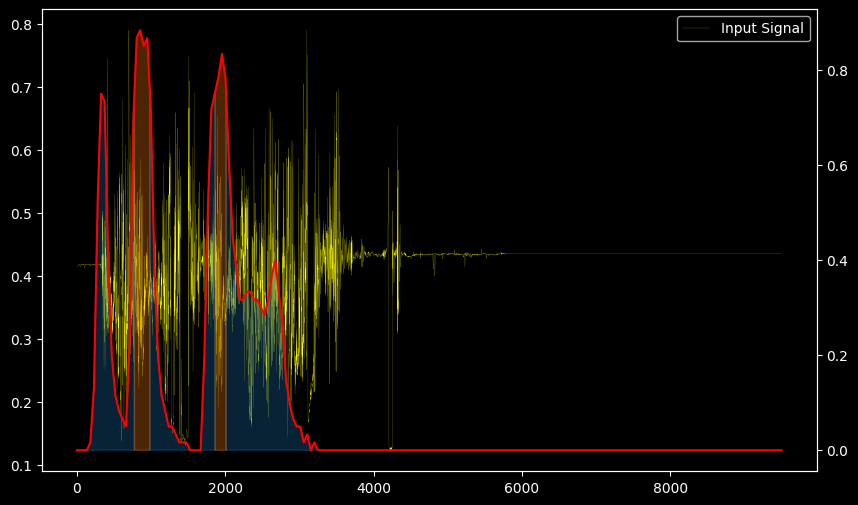

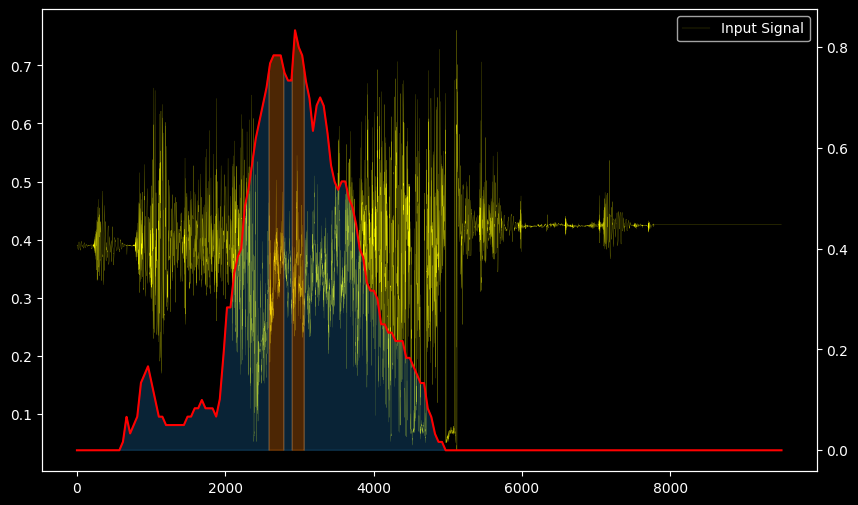

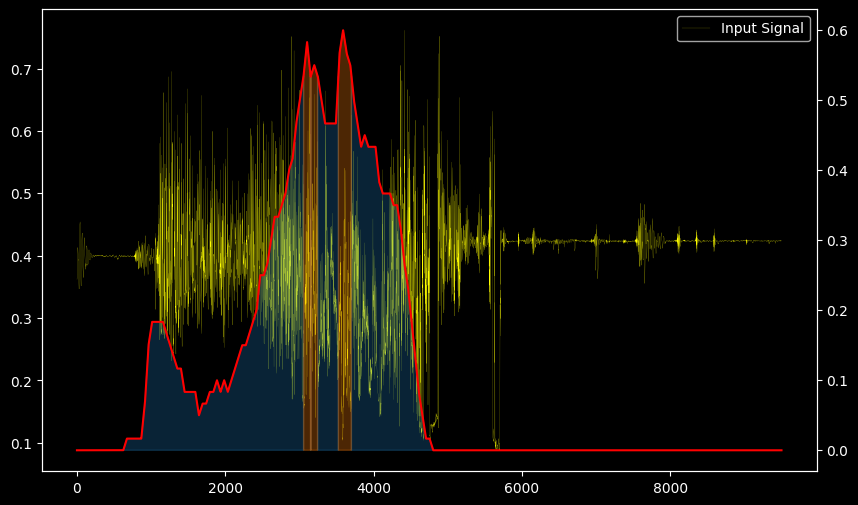

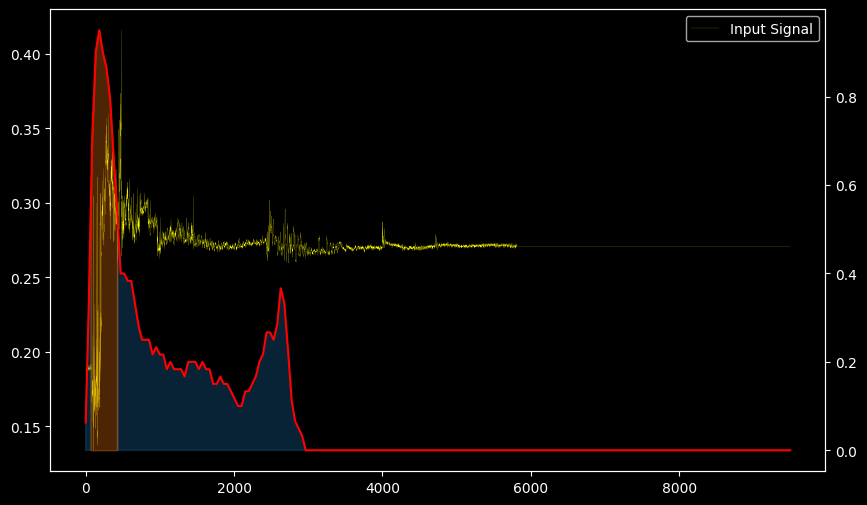

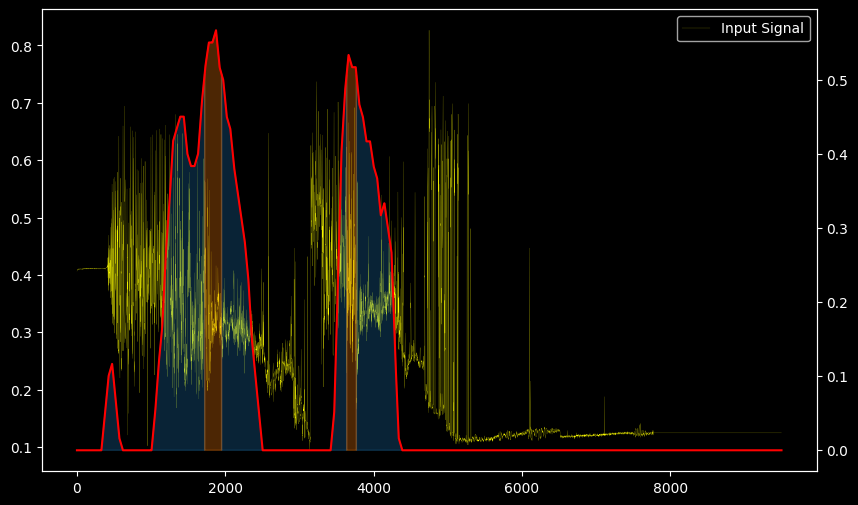

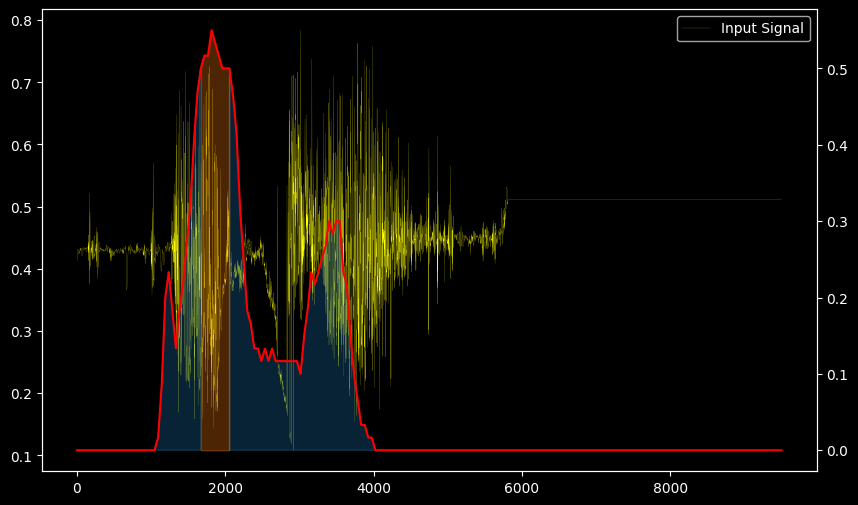

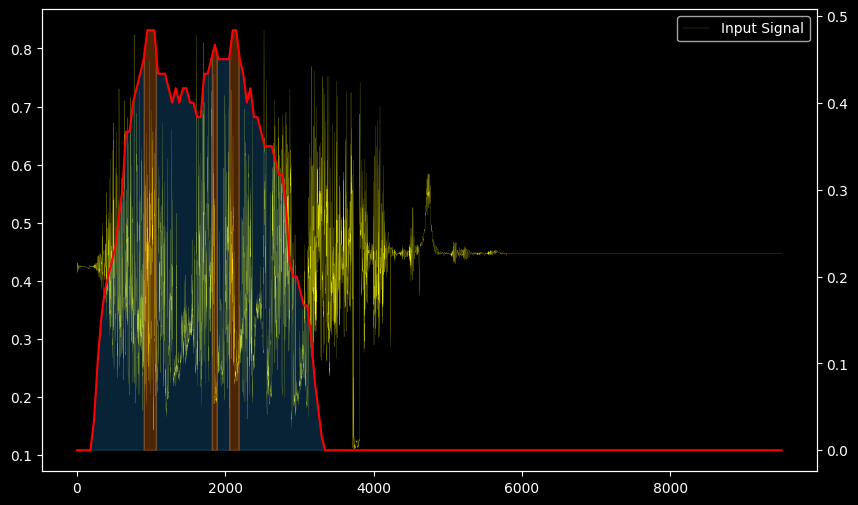

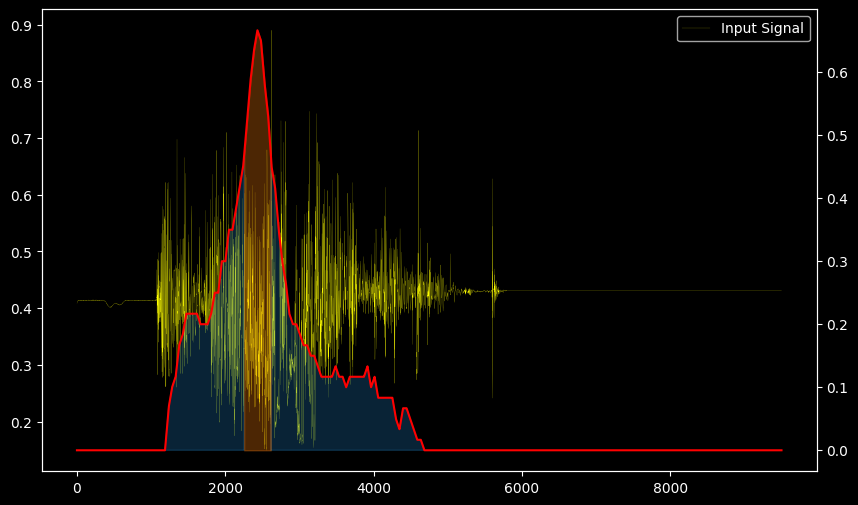

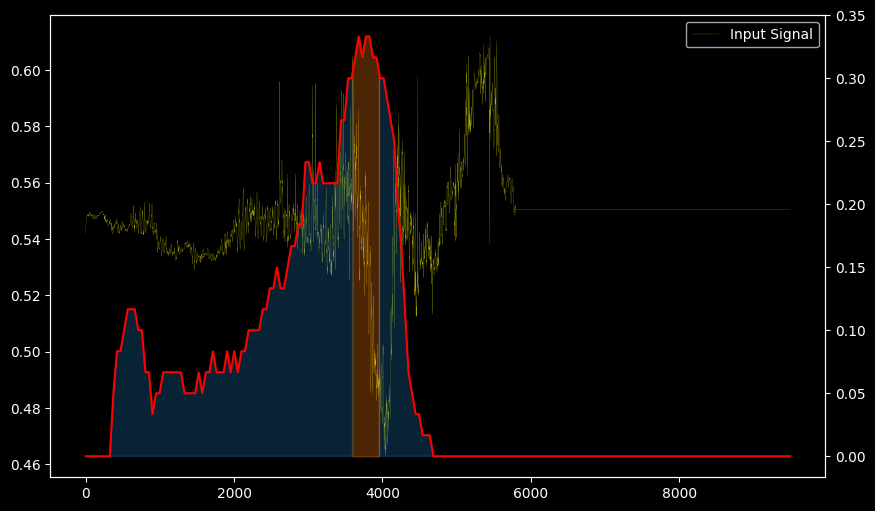

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the colors for the segments
segment_colors = cm.tab10(np.linspace(0, 1, 10))

for i in range(10):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

    # Plot the input signal
    ax.plot(X_test[i, :, 0], label='Input Signal', c='yellow', linewidth=0.1)

    # Plot the output signal
    ax2 = ax.twinx()
    ax2.plot(y_test[i, :, 0], label='Output Signal')

    # Plot the segmentation mask
    mask = y_test[i, :, 1]
    for j in range(1, int(mask.max()) + 1):
        ax2.fill_between(np.arange(mask.shape[0]), y_test[i, :, 0], where=(mask == j), alpha=0.3, label=f'Segment {j}', color=segment_colors[j-1])

    ax.legend()
    plt.show()

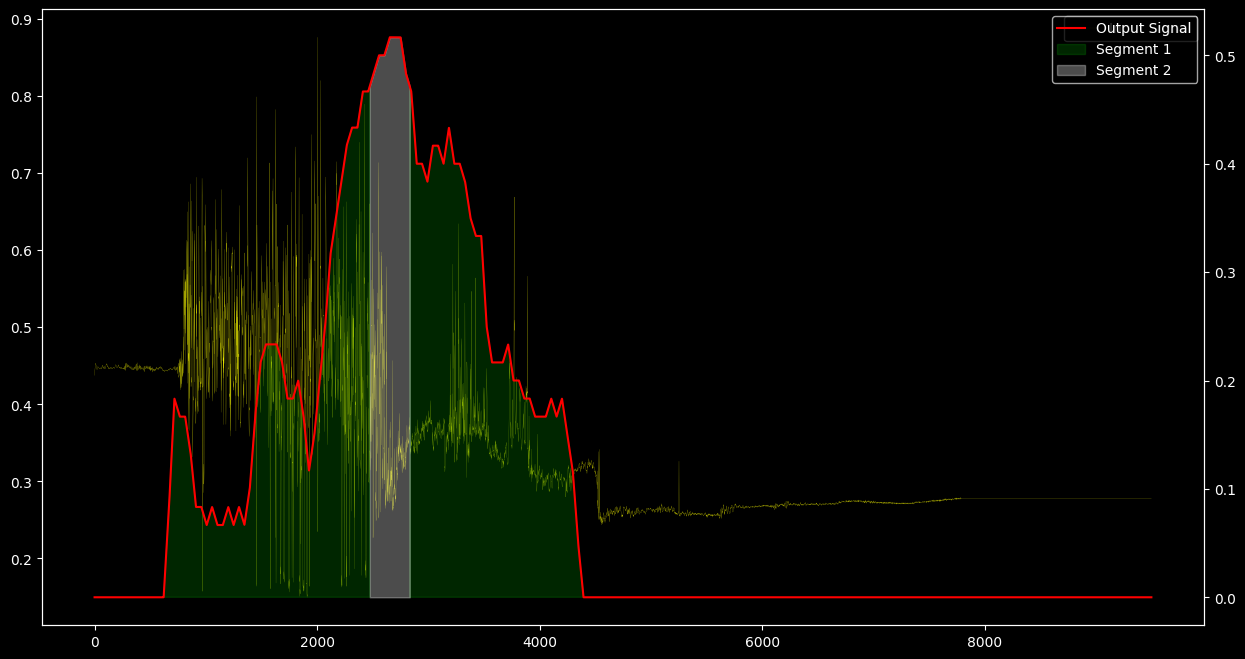

In [ ]:
for i in range(1):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

    # Plot the input signal
    ax.plot(X_test[i, :, 0], label='Input Signal', c='yellow', linewidth=0.1)

    # Plot the output signal
    ax2 = ax.twinx()
    ax2.plot(y_test[i, :, 0], label='Output Signal')
    
    # Plot the segmentation mask
    mask = y_test[i, :, 1]
    for j in range(1, int(mask.max()) + 1):
        if j == 1:
            ax2.fill_between(np.arange(mask.shape[0]), y_test[i, :, 0], where=(mask == j), alpha=0.3, label=f'Segment {j}', color='green')
        elif j == 2:
            ax2.fill_between(np.arange(mask.shape[0]), y_test[i, :, 0], where=(mask == j), alpha=0.3, label=f'Segment {j}', color='white')
        elif j == 3:
            ax2.fill_between(np.arange(mask.shape[0]), y_test[i, :, 0], where=(mask == j), alpha=0.3, label=f'Segment {j}', color='purple')
        else:
            ax2.fill_between(np.arange(mask.shape[0]), y_test[i, :, 0], where=(mask == j), alpha=0.3, label=f'Segment {j}', color='red')

    ax.legend()
    ax2.legend()
    plt.show()


In [ ]:
WS = 50
window_size = WS

y_train shape before one-hot encoding: (134, 9500, 6)
y_test shape before one-hot encoding: (34, 9500, 6)
y_train shape after one-hot encoding: (134, 9500, 6)
y_test shape after one-hot encoding: (34, 9500, 6)
Epoch 1/300
30/30 [==============================] - 78s 267ms/step - loss: 0.2692 - val_loss: 0.2175
Epoch 2/300
30/30 [==============================] - 6s 208ms/step - loss: 0.2179 - val_loss: 0.2080
Epoch 3/300
30/30 [==============================] - 6s 208ms/step - loss: 0.2122 - val_loss: 0.2055
Epoch 4/300
30/30 [==============================] - 6s 207ms/step - loss: 0.2120 - val_loss: 0.2072
Epoch 5/300
30/30 [==============================] - 6s 209ms/step - loss: 0.2093 - val_loss: 0.2011
Epoch 6/300
30/30 [==============================] - 6s 208ms/step - loss: 0.2054 - val_loss: 0.2009
Epoch 7/300
30/30 [==============================] - 6s 207ms/step - loss: 0.2050 - val_loss: 0.1976
Epoch 8/300
30/30 [==============================] - 6s 207ms/step - loss: 0.2030 

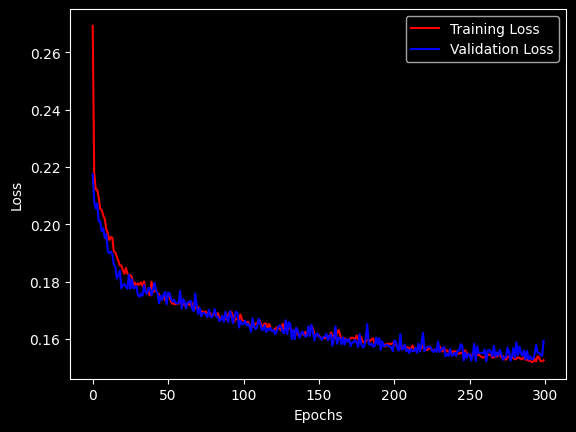

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Lambda, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import UpSampling1D

import matplotlib.pyplot as plt

print("y_train shape before one-hot encoding:", y_train.shape)
print("y_test shape before one-hot encoding:", y_test.shape)

y_train_segmentation = to_categorical(y_train[:, :, 1], num_classes=5)
y_test_segmentation = to_categorical(y_test[:, :, 1], num_classes=5)

y_train = np.concatenate([y_train[:, :, :1], y_train_segmentation], axis=-1)
y_test = np.concatenate([y_test[:, :, :1], y_test_segmentation], axis=-1)

print("y_train shape after one-hot encoding:", y_train.shape)
print("y_test shape after one-hot encoding:", y_test.shape)

def transformer_encoder(inputs, num_heads=8, dff=2048, rate=0.01):
    x = inputs
    for _ in range(3):
        attn_output = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=x.shape[-1])(x, x)
        attn_output = Dropout(rate)(attn_output)
        out1 = LayerNormalization(epsilon=1e-6)(x + attn_output)

        ffn_output = Dense(dff, activation='relu', kernel_regularizer=l2(1e-4))(out1)
        ffn_output = Dense(x.shape[-1], kernel_regularizer=l2(1e-4))(ffn_output)
        ffn_output = Dropout(rate)(ffn_output)

        x = LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

    return x

# def custom_loss(y_true, y_pred, alpha=0.1, beta=0.1):
#     y_true_signal = y_true[:, :, 0]
#     y_pred_signal = y_pred[:, :, 0]

#     mse = tf.keras.losses.MeanSquaredError()(y_true_signal, y_pred_signal)

#     y_true_segmentation = y_true[:, :, 1:]
#     y_pred_segmentation = y_pred[:, :, 1:]
#     segmentation_loss = tf.keras.losses.categorical_crossentropy(y_true_segmentation, y_pred_segmentation, from_logits=False)

#     beta = tf.cast(beta, dtype=mse.dtype)

#     return mse + alpha * segmentation_loss + beta


def custom_loss(y_true, y_pred, alpha=0.1, beta=0.1, WS=50):
    y_true_signal = y_true[:, :, 0]
    y_pred_signal = y_pred[:, :, 0]

    # Calculate the number of chunks for smoothing
    num_chunks = tf.shape(y_pred_signal)[1] // WS

    # Reshape the predicted signal into chunks
    pred_chunks = tf.reshape(y_pred_signal[:, :num_chunks * WS], (-1, WS))

    # Smooth each chunk by taking the mean
    smoothed_pred_chunks = tf.reduce_mean(pred_chunks, axis=1)

    # Repeat and reshape the smoothed chunks to match the original signal length
    smoothed_pred_signal = tf.reshape(tf.repeat(smoothed_pred_chunks, WS), tf.shape(y_pred_signal))

    # Calculate the mean squared error
    mse = tf.keras.losses.MeanSquaredError()(y_true_signal, smoothed_pred_signal)

    y_true_segmentation = y_true[:, :, 1:]
    y_pred_segmentation = y_pred[:, :, 1:]
    segmentation_loss = tf.keras.losses.categorical_crossentropy(y_true_segmentation, y_pred_segmentation, from_logits=False)

    beta = tf.cast(beta, dtype=mse.dtype)

    return mse + alpha * segmentation_loss + beta



def create_model():
    input_layer = Input(shape=(9500, 1))
    
    x = Conv1D(16, 5, activation='relu', padding='same')(input_layer)
    x = MaxPooling1D(2, padding='same')(x)
    
    x = transformer_encoder(x)
    
    x = UpSampling1D(2)(x)
    
    # Pad sequences back to original length
    x = Lambda(lambda x: tf.pad(x, paddings=[[0, 0], [0, 9500 - tf.shape(x)[1]], [0, 0]]))(x)
    
    output_signal = Dense(1, activation='relu', kernel_regularizer=l2(1e-4))(x)  # Added 'relu' activation
    output_signal = Lambda(lambda x: tf.squeeze(x, axis=-1))(output_signal)
    output_segmentation = Dense(5, activation='softmax', kernel_regularizer=l2(1e-4))(x)
    
    output = tf.keras.layers.Concatenate(axis=-1)([tf.expand_dims(output_signal, axis=-1), output_segmentation])
    
    model = Model(inputs=input_layer, outputs=output)
    
    return model

# Create and compile the model
model = create_model()

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=lambda y_true, y_pred: custom_loss(y_true, y_pred))

# Fit the model for the first 100 epochs with learning rate 0.001
history = model.fit(X_train, y_train, batch_size=4, epochs=300, validation_split=0.1)

# Plot the training curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# CUT

1/1 [==============================] - 2s 2s/step


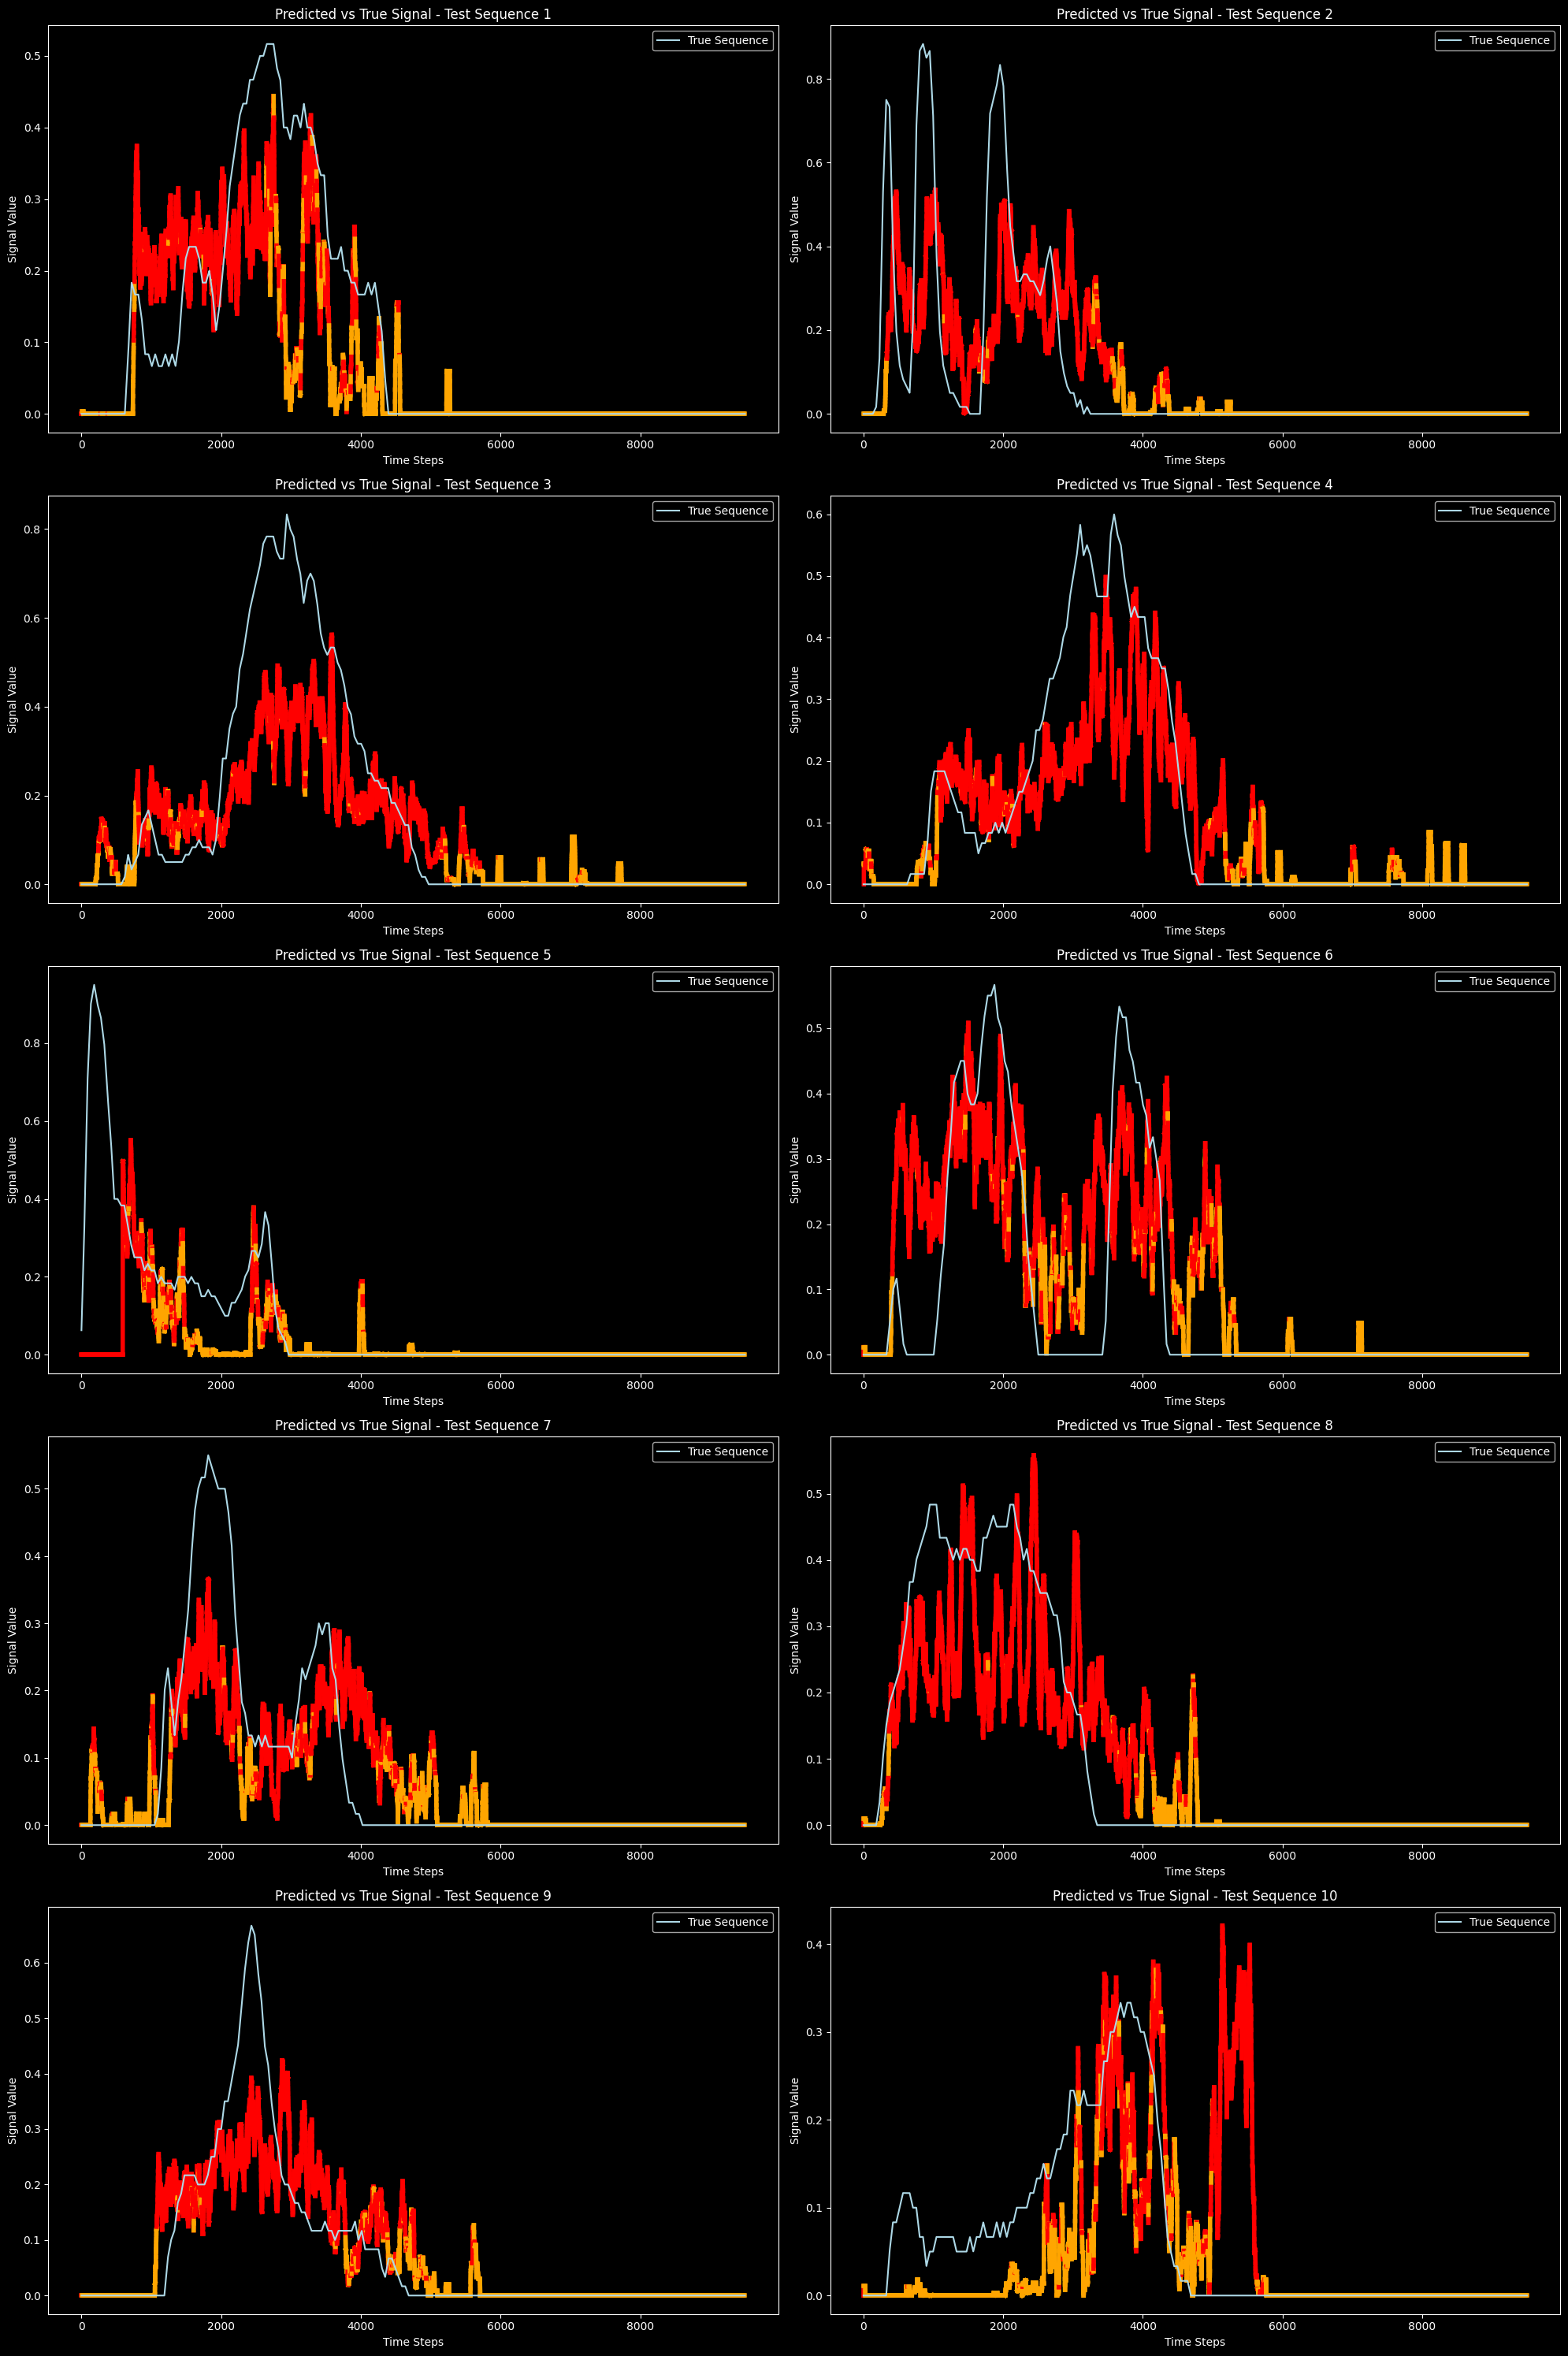

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions using the model
predicted_sequences = model.predict(X_test[:10])

# Replace all negative values with 0
predicted_sequences = np.maximum(predicted_sequences, 0)

# Define segment colors
colors = {
    0: 'red',   # no_flow
    1: 'orange',   # flow
    2: 'yellow',    # max
}

# Create a single plot with a grid of 2 columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))

for i in range(10):
    ax = axes[i // 2, i % 2]

    # Get the predicted segmentation mask for the sequence
    predicted_segmentation_mask = np.argmax(predicted_sequences[i, :, 1:], axis=1)

    index_1 = np.where(predicted_segmentation_mask == 1)

    if index_1[0].size > 0:
        n1 = index_1[0][0]
        n2 = index_1[0][-1] + 1

        # Smooth the predicted signal
        predicted_sequences[i, :, 0] = np.convolve(predicted_sequences[i, :, 0], np.ones(WS) / WS, mode='same')

        # Apply cutoff to the smoothed signal
        predicted_sequences[i, :, 0][:n1] = 0
        predicted_sequences[i, :, 0][n2:] = 0

    # Plot the predicted sequence with different colors based on the predicted segment class
    for j in range(len(predicted_sequences[i, :, 0]) - 1):
        segment_class = predicted_segmentation_mask[j]
        ax.plot([j, j+1], [predicted_sequences[i, :, 0][j], predicted_sequences[i, :, 0][j+1]],
                 color=colors[segment_class], linewidth=4)

    ax.plot(y_test[i, :, 0], label='True Sequence', c='lightblue')

    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Signal Value')
    ax.legend()
    ax.set_title(f'Predicted vs True Signal - Test Sequence {i + 1}')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


## Continue Training (if needed)

Epoch 1/30
30/30 [==============================] - 77s 268ms/step - loss: 0.1513 - val_loss: 0.1528
Epoch 2/30
30/30 [==============================] - 6s 209ms/step - loss: 0.1506 - val_loss: 0.1530
Epoch 3/30
30/30 [==============================] - 6s 208ms/step - loss: 0.1506 - val_loss: 0.1534
Epoch 4/30
30/30 [==============================] - 6s 208ms/step - loss: 0.1507 - val_loss: 0.1531
Epoch 5/30
30/30 [==============================] - 6s 208ms/step - loss: 0.1505 - val_loss: 0.1526
Epoch 6/30
30/30 [==============================] - 6s 208ms/step - loss: 0.1505 - val_loss: 0.1539
Epoch 7/30
30/30 [==============================] - 6s 208ms/step - loss: 0.1505 - val_loss: 0.1534
Epoch 8/30
30/30 [==============================] - 6s 209ms/step - loss: 0.1505 - val_loss: 0.1530
Epoch 9/30
30/30 [==============================] - 6s 208ms/step - loss: 0.1505 - val_loss: 0.1533
Epoch 10/30
30/30 [==============================] - 6s 209ms/step - loss: 0.1505 - val_loss: 0.154

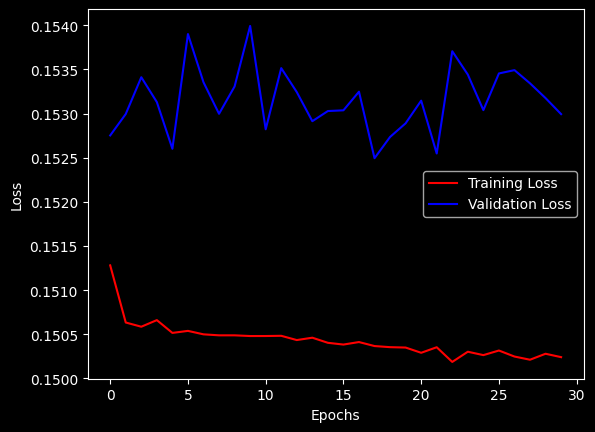

In [ ]:
# Set a new learning rate
new_learning_rate = 0.00001

# Update the optimizer with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)

# Compile the model with the updated optimizer
model.compile(optimizer=optimizer, loss=lambda y_true, y_pred: custom_loss(y_true, y_pred))

# Continue training the model for an additional 10 epochs
continued_history = model.fit(X_train, y_train, batch_size=4, epochs=30, validation_split=0.1)

# Plot the training curve for the continued training
plt.plot(continued_history.history['loss'], label='Training Loss')
plt.plot(continued_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 188ms/step


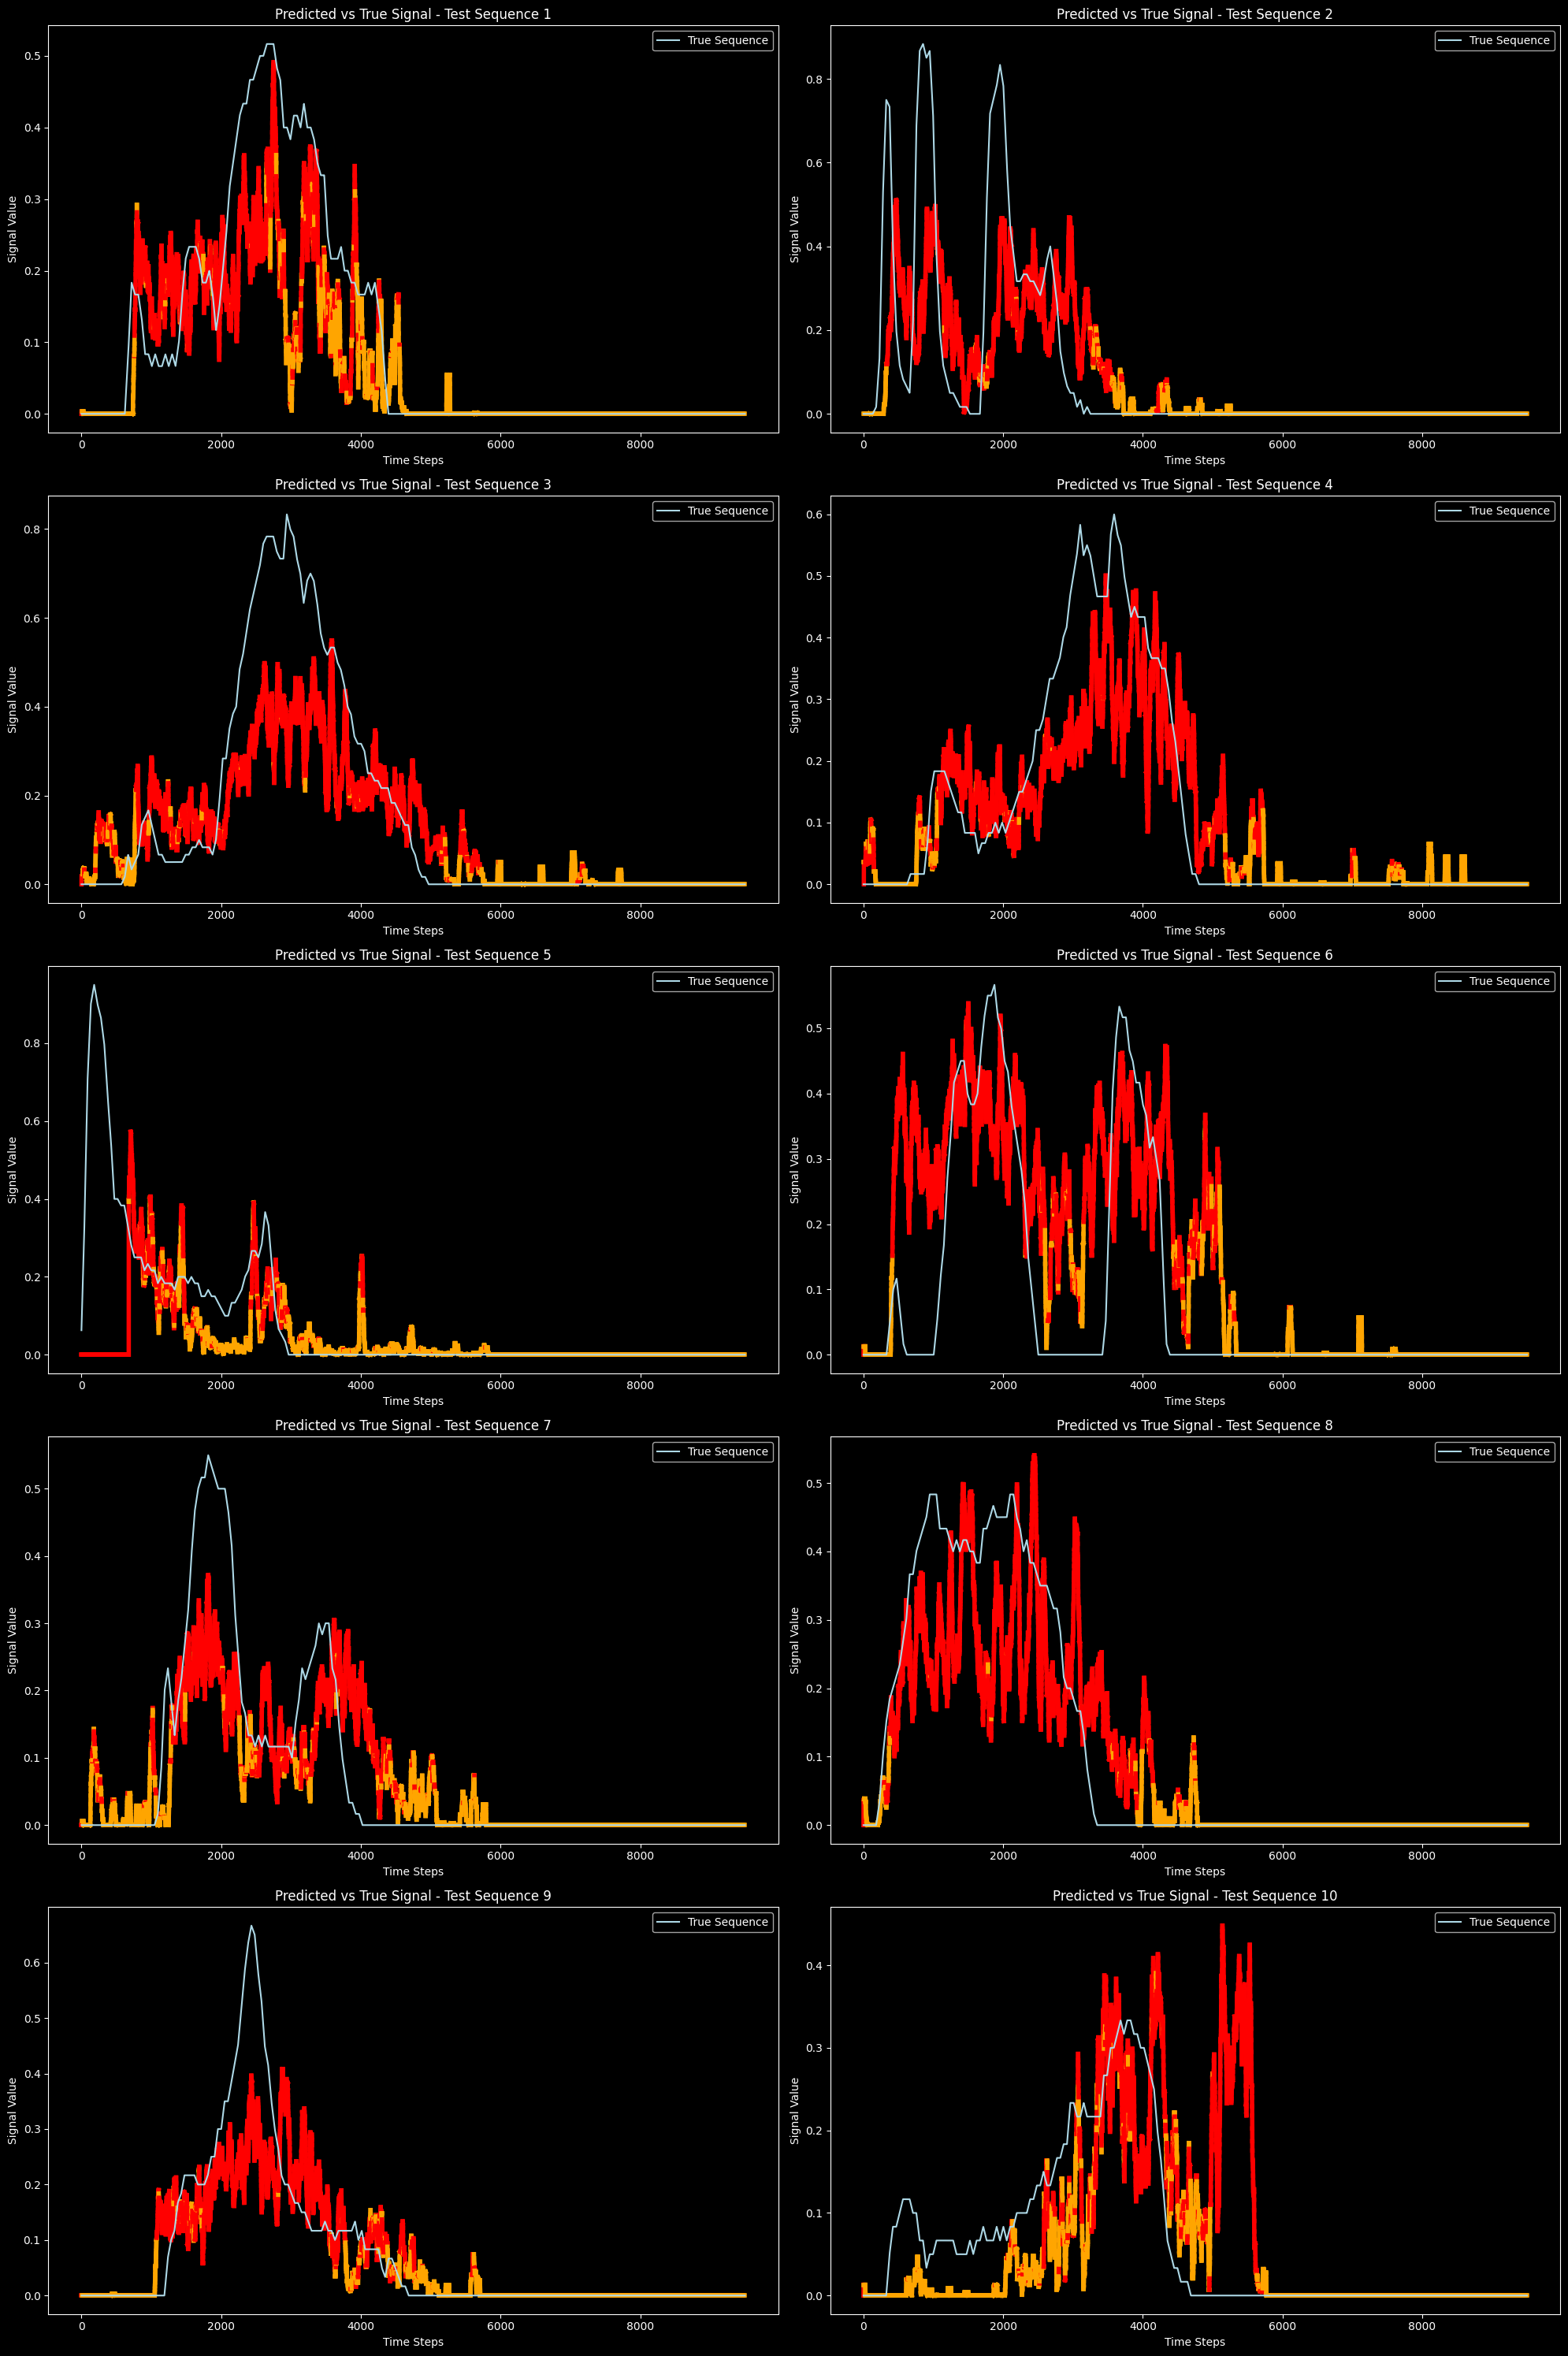

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions using the model
predicted_sequences = model.predict(X_test[:10])

# Replace all negative values with 0
predicted_sequences = np.maximum(predicted_sequences, 0)

# Define segment colors
colors = {
    0: 'red',   # no_flow
    1: 'orange',   # flow
    2: 'yellow',    # max
}

# Create a single plot with a grid of 2 columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))

for i in range(10):
    ax = axes[i // 2, i % 2]

    # Get the predicted segmentation mask for the sequence
    predicted_segmentation_mask = np.argmax(predicted_sequences[i, :, 1:], axis=1)

    index_1 = np.where(predicted_segmentation_mask == 1)

    if index_1[0].size > 0:
        n1 = index_1[0][0]
        n2 = index_1[0][-1] + 1

        # Smooth the predicted signal
        predicted_sequences[i, :, 0] = np.convolve(predicted_sequences[i, :, 0], np.ones(WS) / WS, mode='same')

        # Apply cutoff to the smoothed signal
        predicted_sequences[i, :, 0][:n1] = 0
        predicted_sequences[i, :, 0][n2:] = 0

    # Plot the predicted sequence with different colors based on the predicted segment class
    for j in range(len(predicted_sequences[i, :, 0]) - 1):
        segment_class = predicted_segmentation_mask[j]
        ax.plot([j, j+1], [predicted_sequences[i, :, 0][j], predicted_sequences[i, :, 0][j+1]],
                 color=colors[segment_class], linewidth=4)

    ax.plot(y_test[i, :, 0], label='True Sequence', c='lightblue')

    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Signal Value')
    ax.legend()
    ax.set_title(f'Predicted vs True Signal - Test Sequence {i + 1}')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()
